# ICR - Identifying Age-Related Conditions

**Background and Objective**


They say age is just a number but a whole host of health issues come with aging. From heart disease and dementia to hearing loss and arthritis, aging is a risk factor for numerous diseases and complications. 

Data science could have a role to play in developing new methods to solve problems with diverse data, even if the number of samples is small.

The goal of this competition is to predict if a person has any of three medical conditions.  We have to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). For this a model trained on measurements of health characteristics.


**Understading Data**

**Id                    --> Unique identifier for each observation.**


**AB-GL                 --> Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.**


**Class A binary target  --> 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.**

**Importing Necessary libraries**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
#importing warning function
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis 

In [3]:
#Loading the dataset
df=pd.read_csv('train.csv')

**a.Get a description, general information, data types, and shape of the dataset.**

In [4]:
# examining first 5 records of the dataset
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
#shape of the dataset
df.shape

(617, 58)

The dataset has 617 records and 58 columns, out of 58 - 56 are health conditions,1 is class (Target Variable) and ID

In [6]:
# datatypes of each features
df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

Column is categorical rest are numerical

In [7]:
#Obtaining a dataset summary
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [8]:
#Obtaining the dataset's general info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

Values are missing in columns like BQ, CB, CC etc.

In [9]:
for a in df.columns:
    countvalue = df[a].value_counts()
    print(f'Column:', a)
    print(countvalue)
    print()

Column: Id
000ff2bfdfe9    1
a20c68851e9b    1
9ee887ad93d5    1
9ef1886b810c    1
9f10f72ca154    1
               ..
50183292c0e7    1
508bb5c5cf00    1
51111505c6f2    1
514d2ac4fdb5    1
ffcca4ded3bb    1
Name: Id, Length: 617, dtype: int64

Column: AB
0.260653    11
0.282018    10
0.337567     9
0.324748     9
0.235015     9
            ..
0.224332     1
0.952879     1
1.066113     1
0.525579     1
0.435846     1
Name: AB, Length: 217, dtype: int64

Column: AF
192.59328     19
3109.03329     1
1076.39180     1
4612.74264     1
7057.21852     1
              ..
2056.42404     1
6162.10892     1
4182.68565     1
1642.84362     1
2672.53426     1
Name: AF, Length: 599, dtype: int64

Column: AH
85.200147     388
128.318406      2
91.801569       2
123.807144      2
226.129185      1
             ... 
94.666830       1
94.335888       1
132.881922      1
132.350673      1
546.663930      1
Name: AH, Length: 227, dtype: int64

Column: AM
630.518230    5
13.217996     2
35.110689     2
1

**Plot all features in the dataset to check distribution using a histogram.**

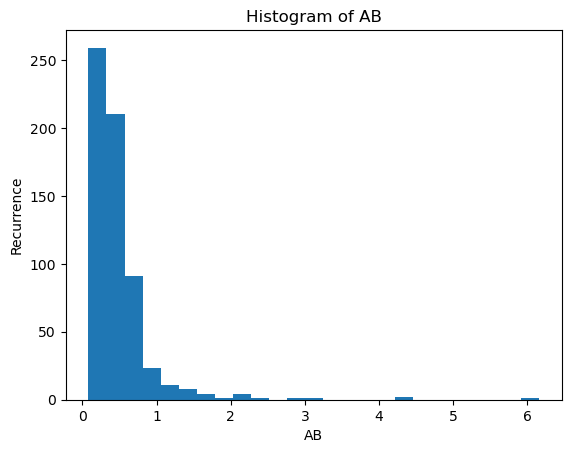

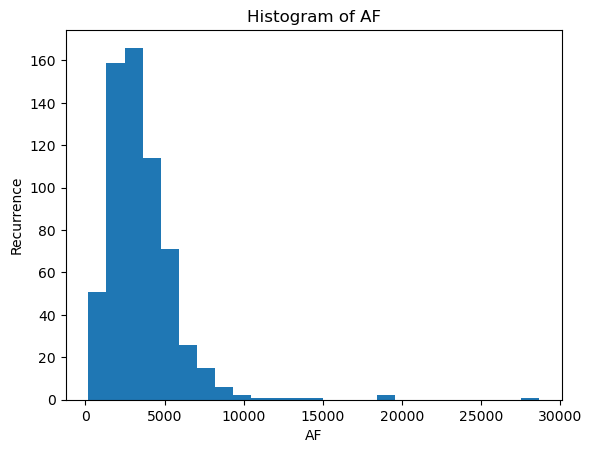

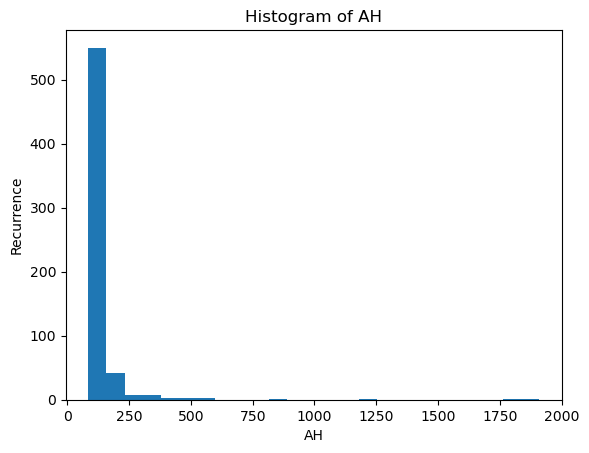

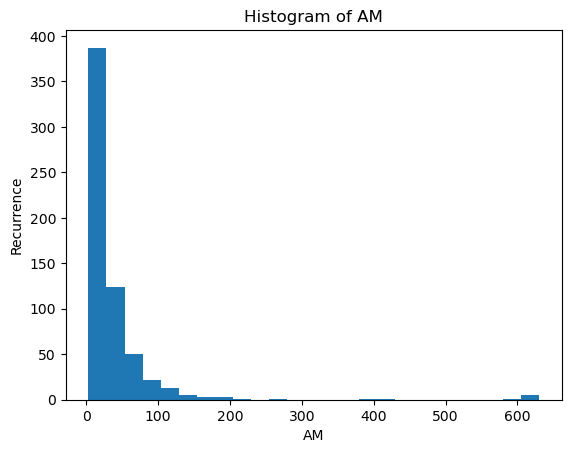

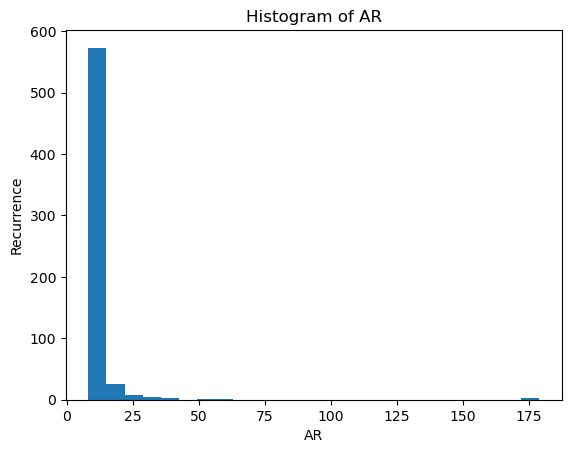

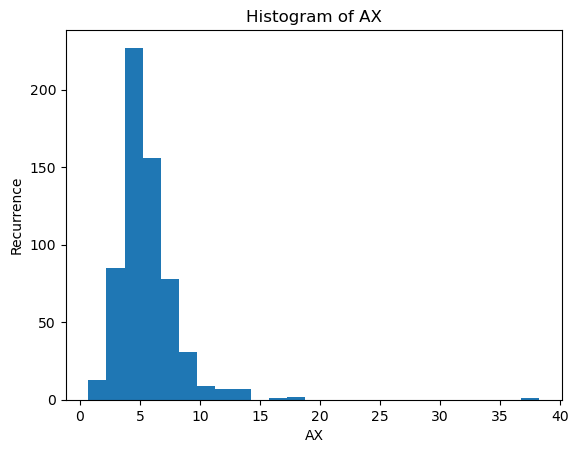

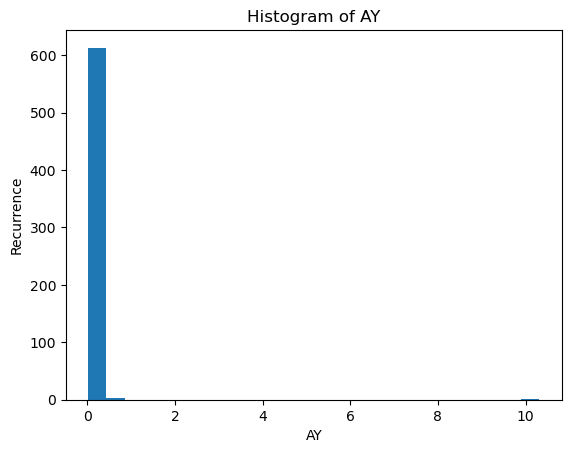

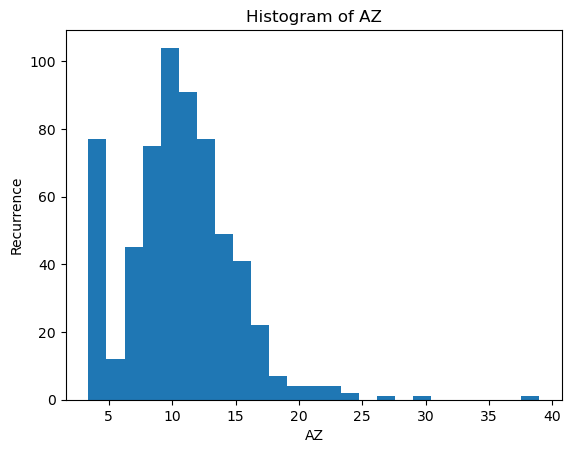

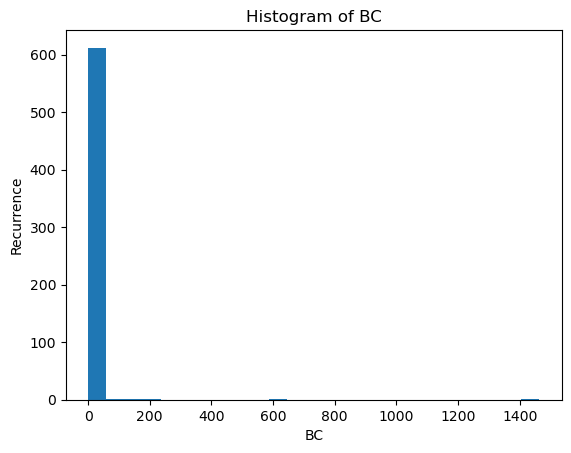

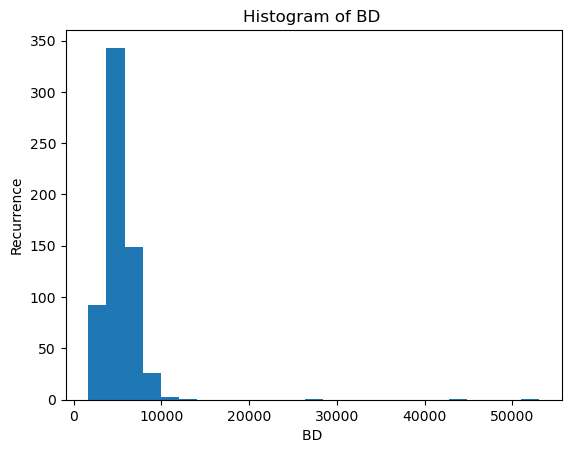

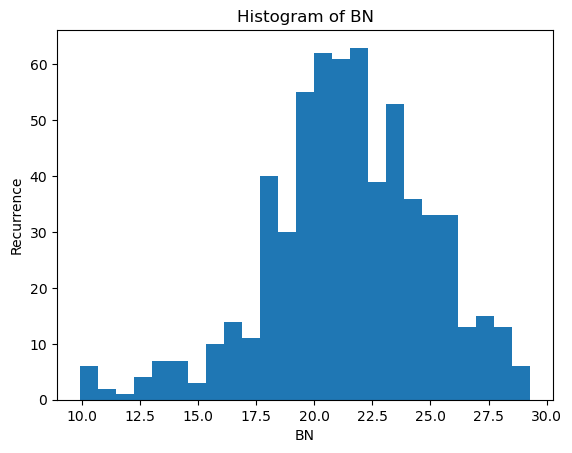

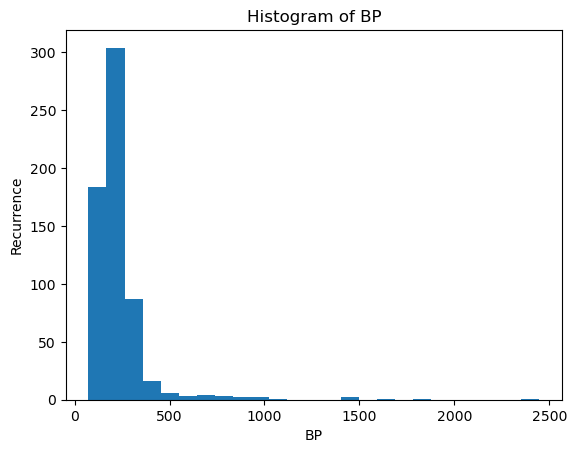

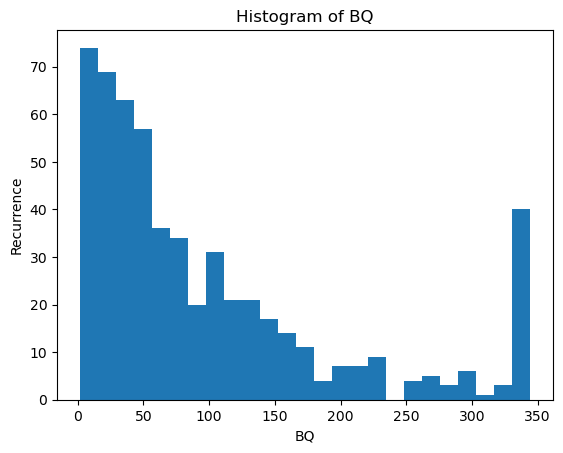

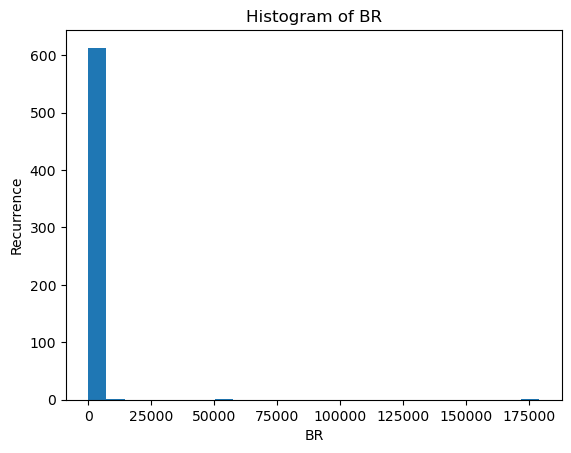

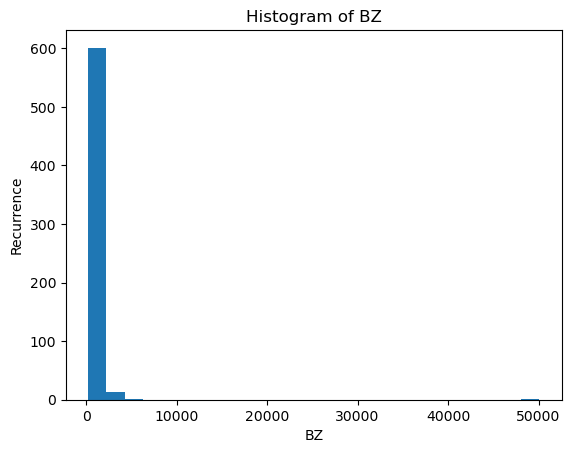

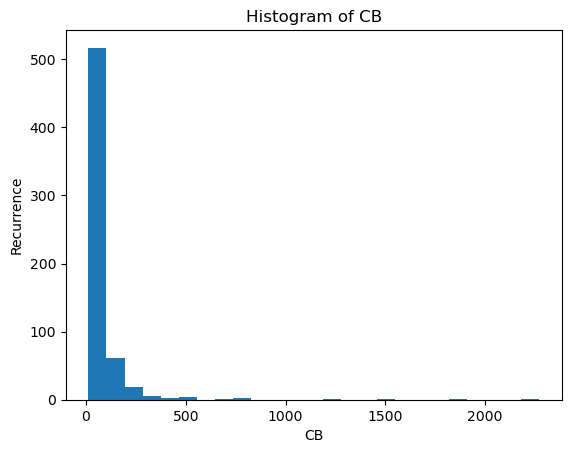

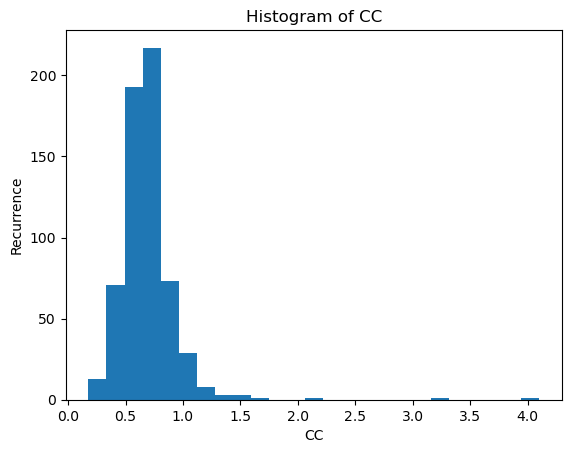

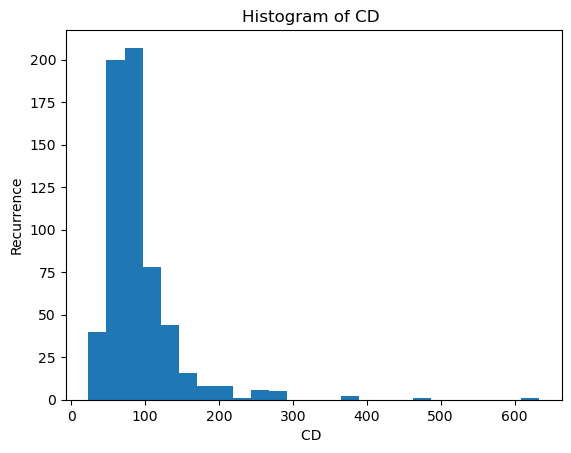

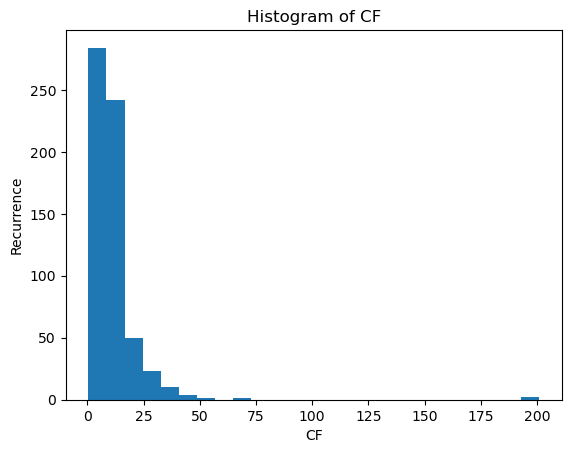

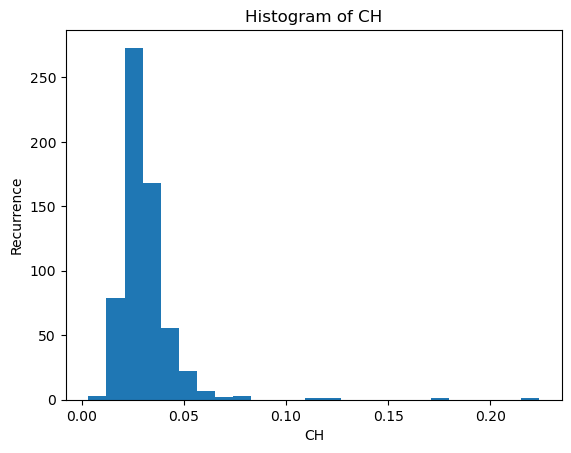

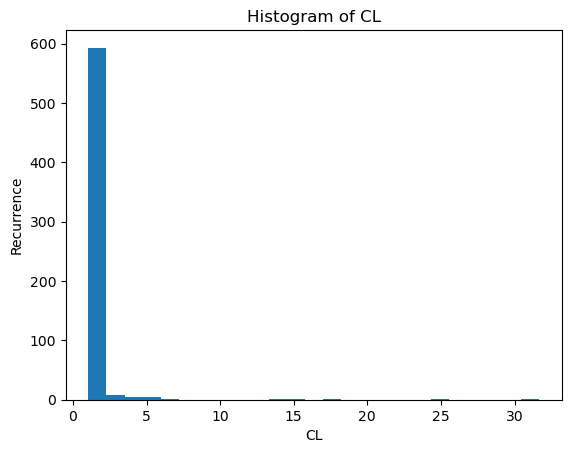

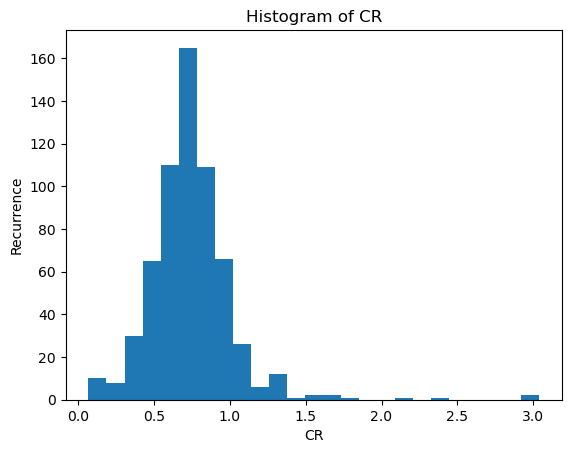

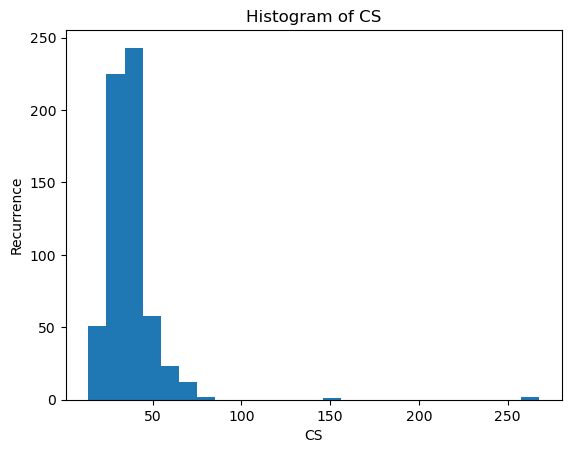

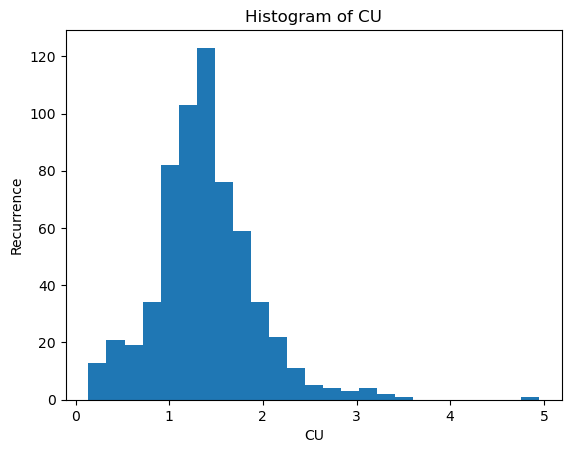

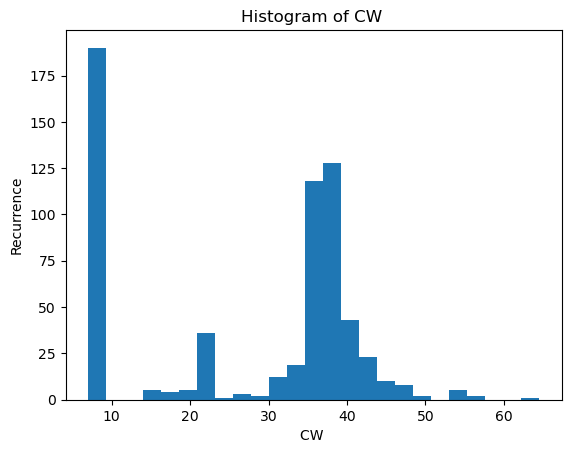

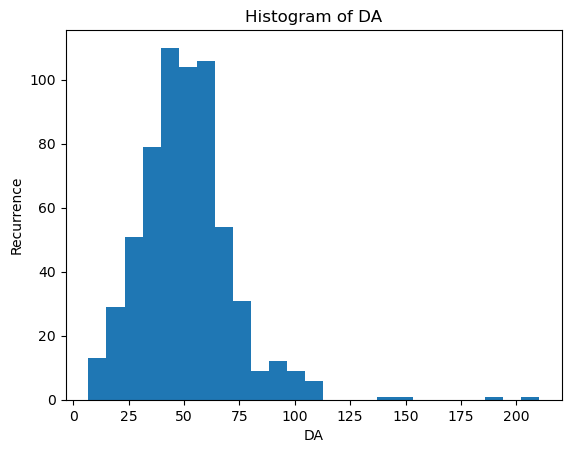

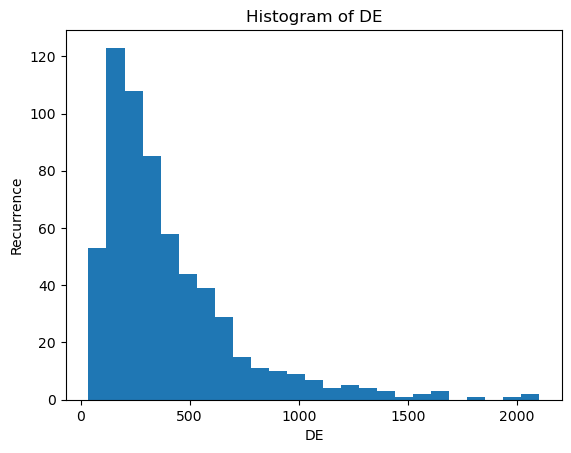

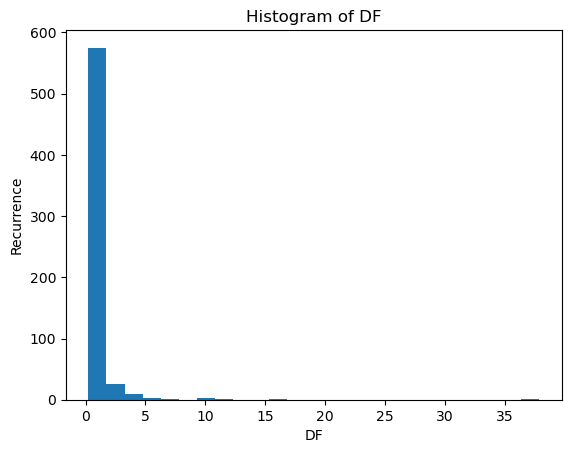

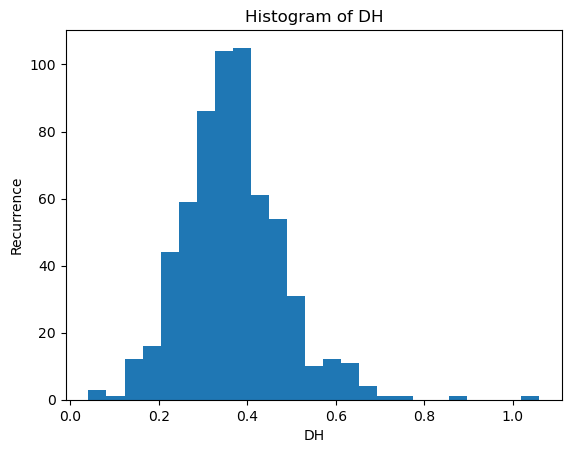

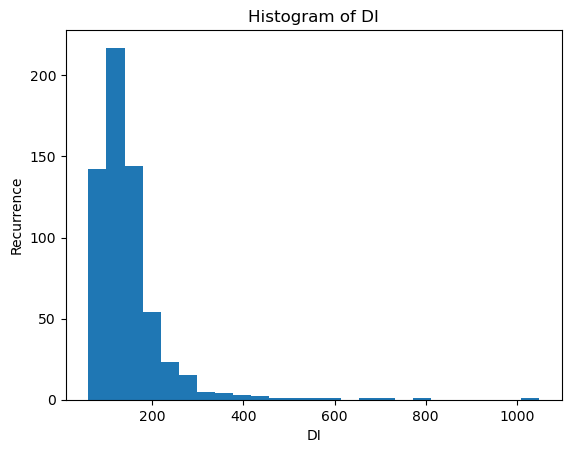

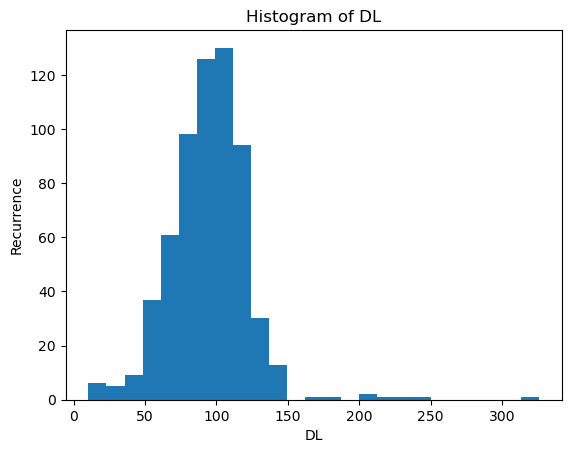

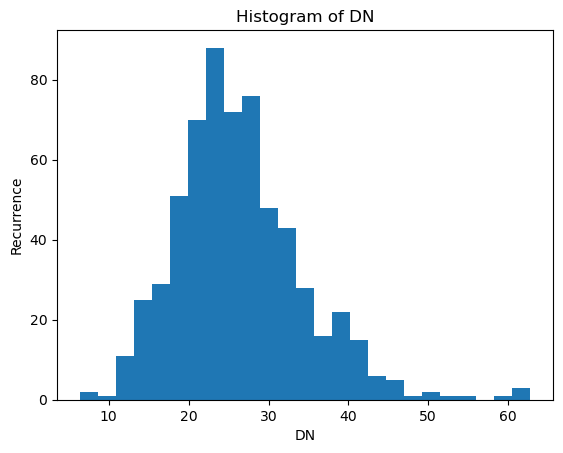

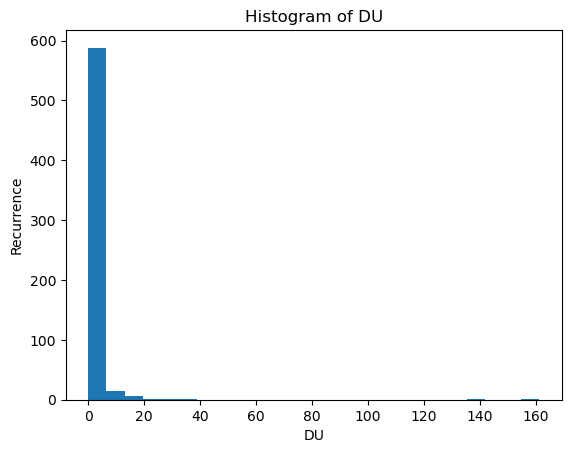

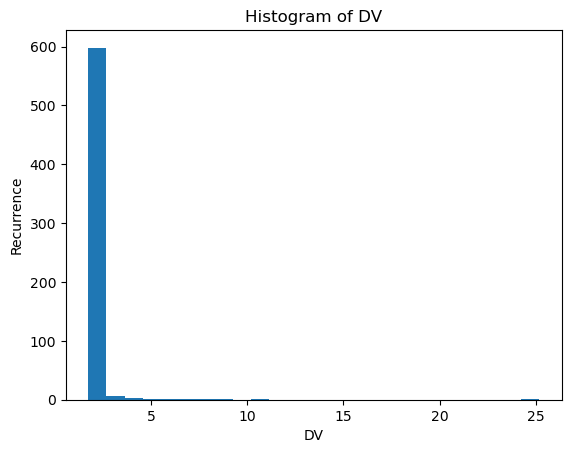

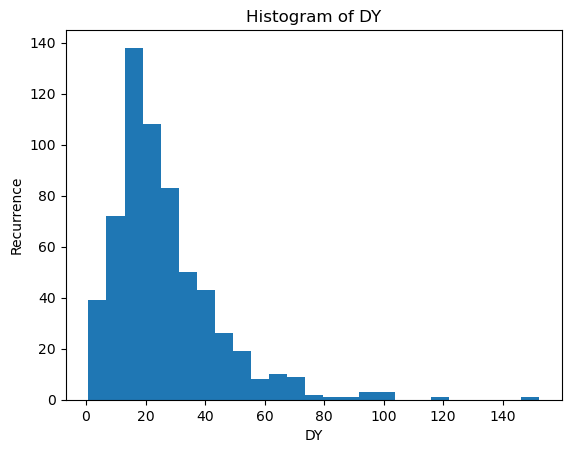

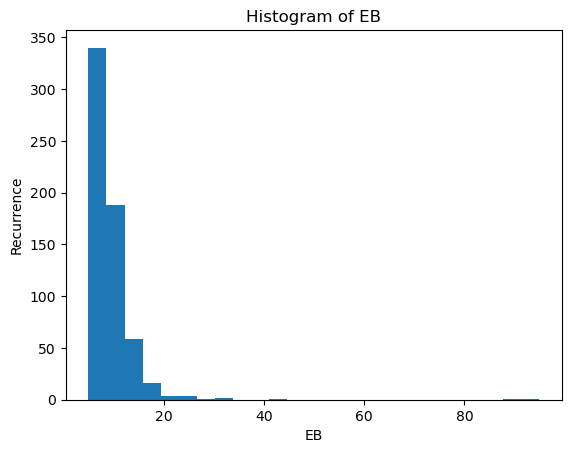

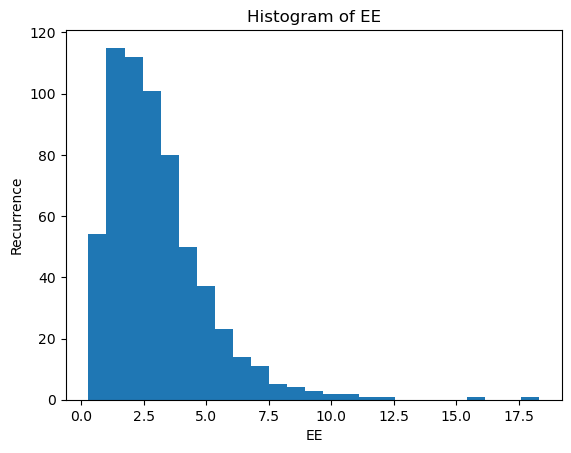

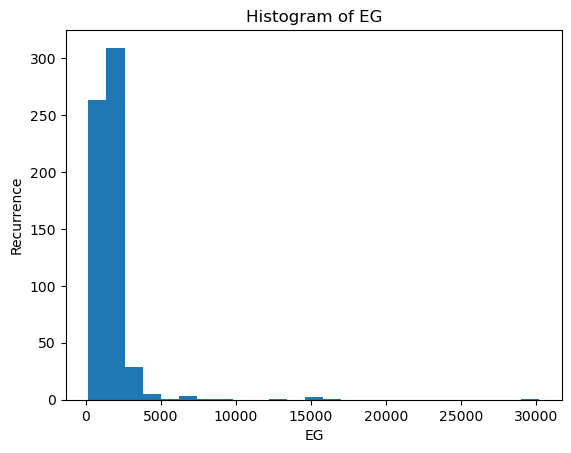

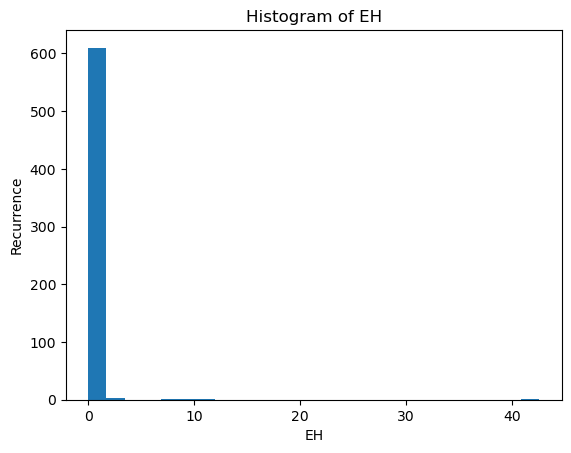

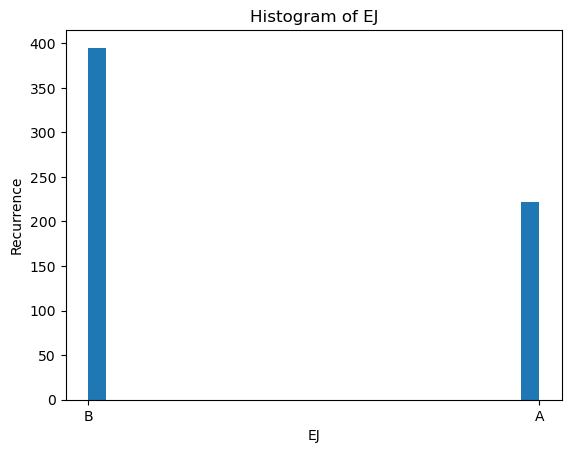

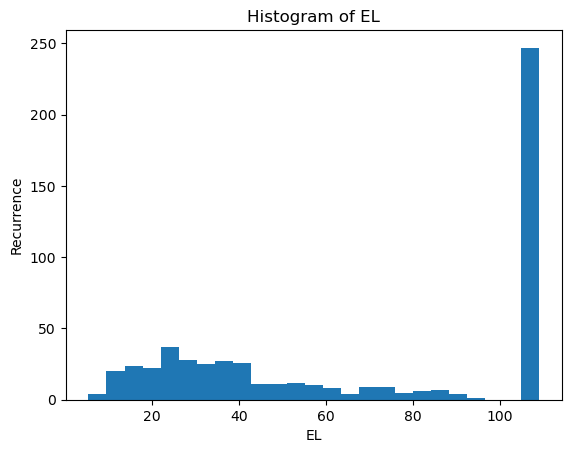

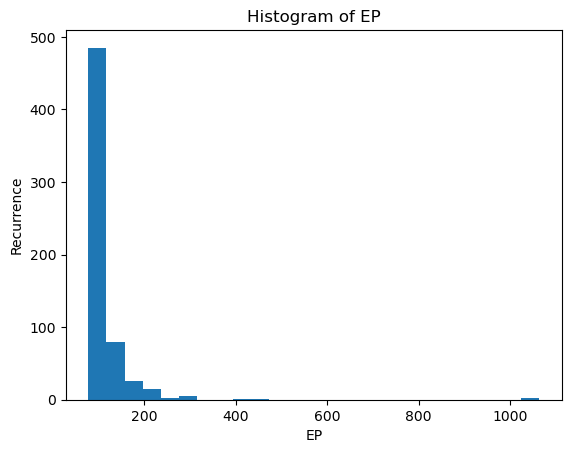

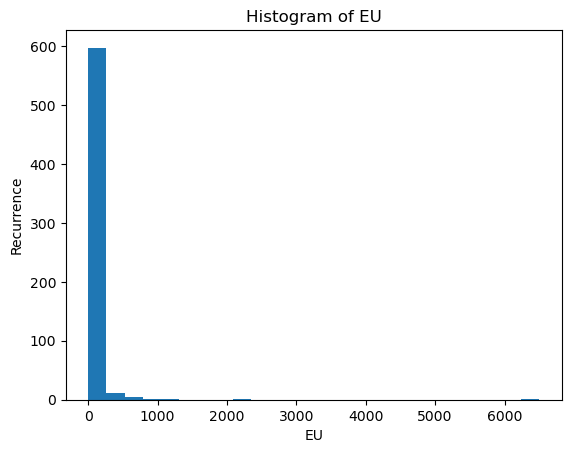

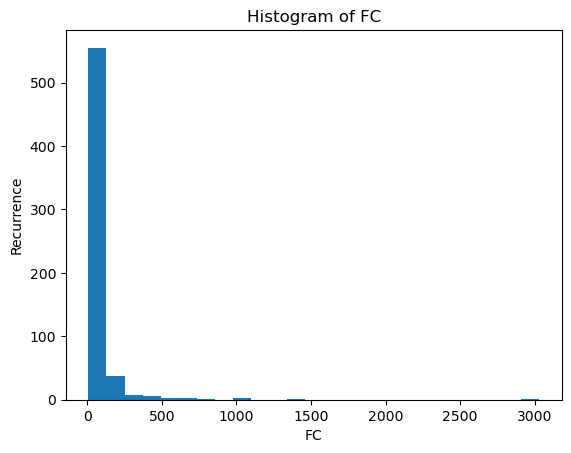

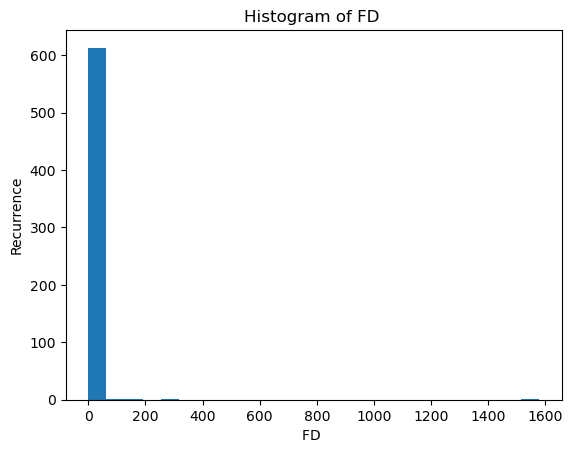

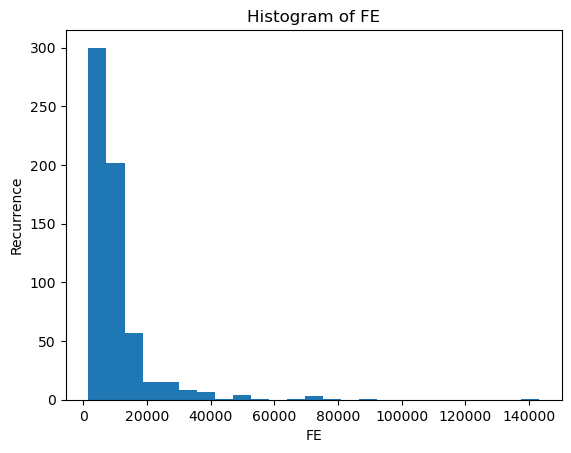

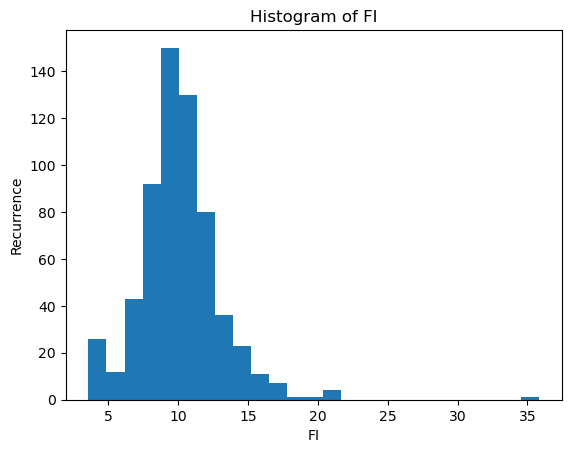

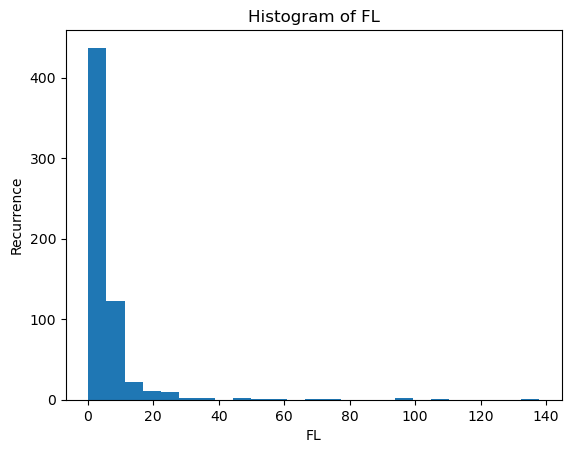

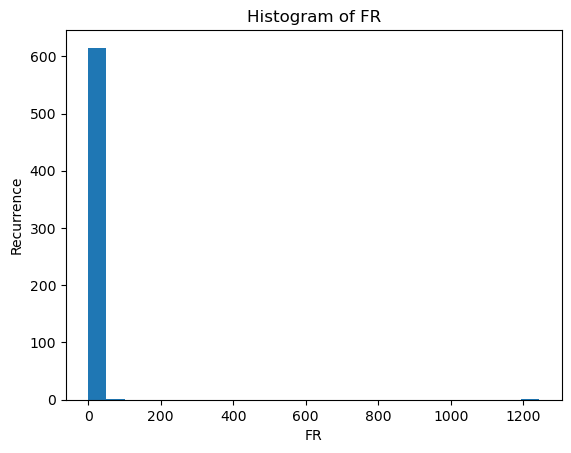

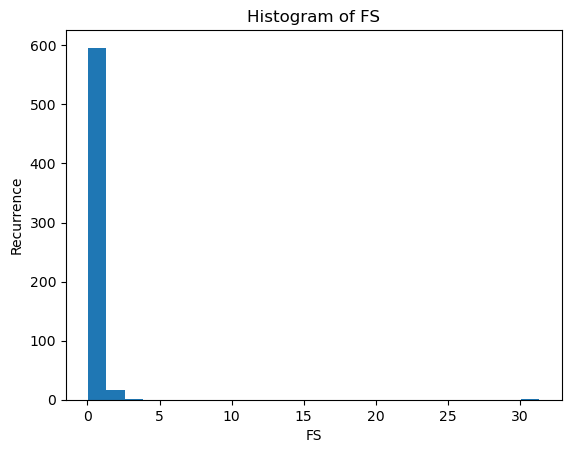

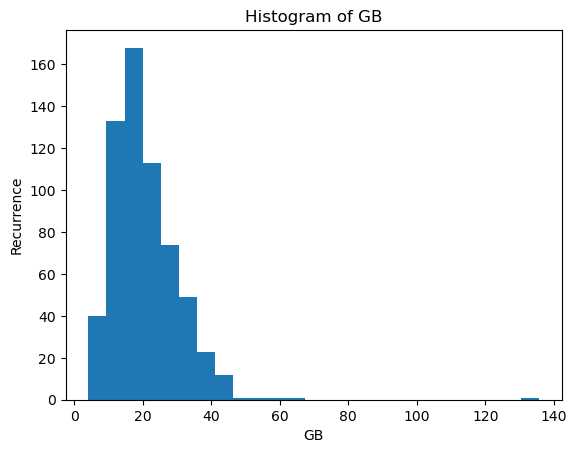

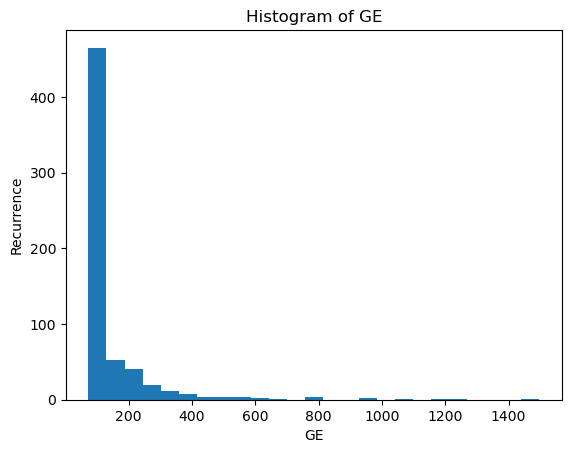

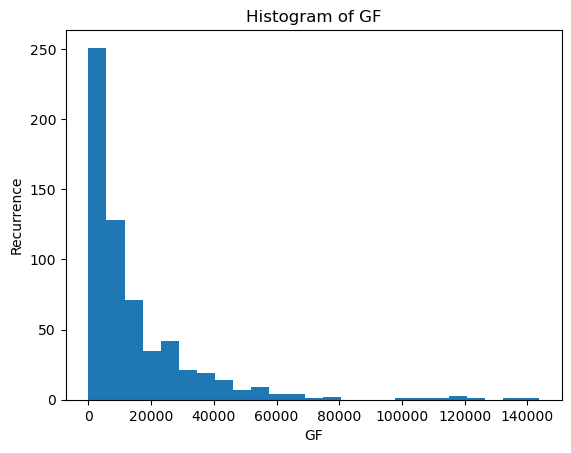

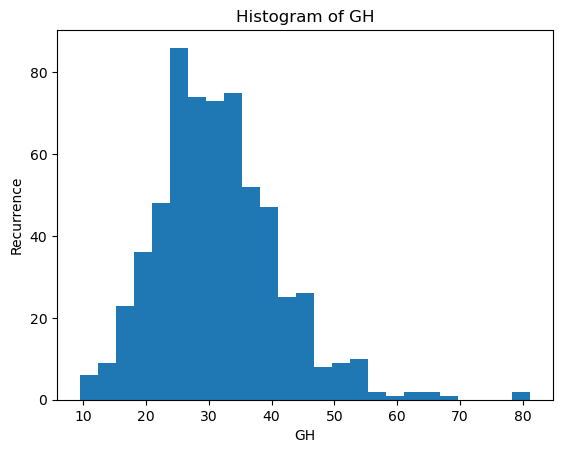

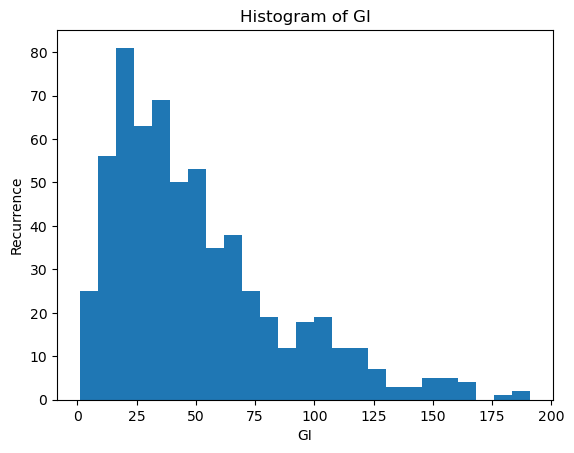

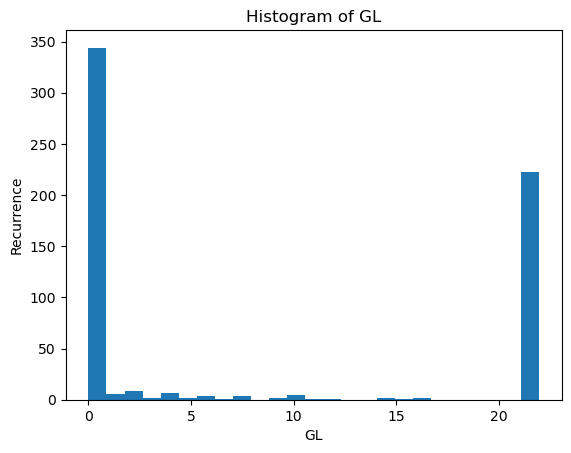

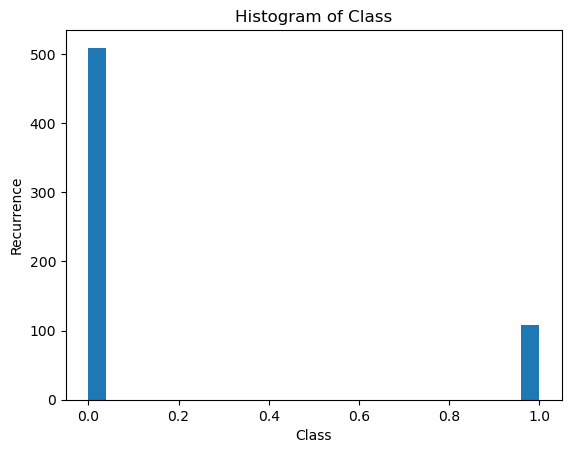

In [10]:
for column in df.columns:
    if column != 'Id':
        plt.hist(df[column], bins=25)
        plt.xlabel(column)
        plt.ylabel('Recurrence')
        plt.title(f'Histogram of {column}')
        plt.show()


Histogram give us the distribution of scores for each health condition, most of the health conditions are right skewed but other skewness is also seen.

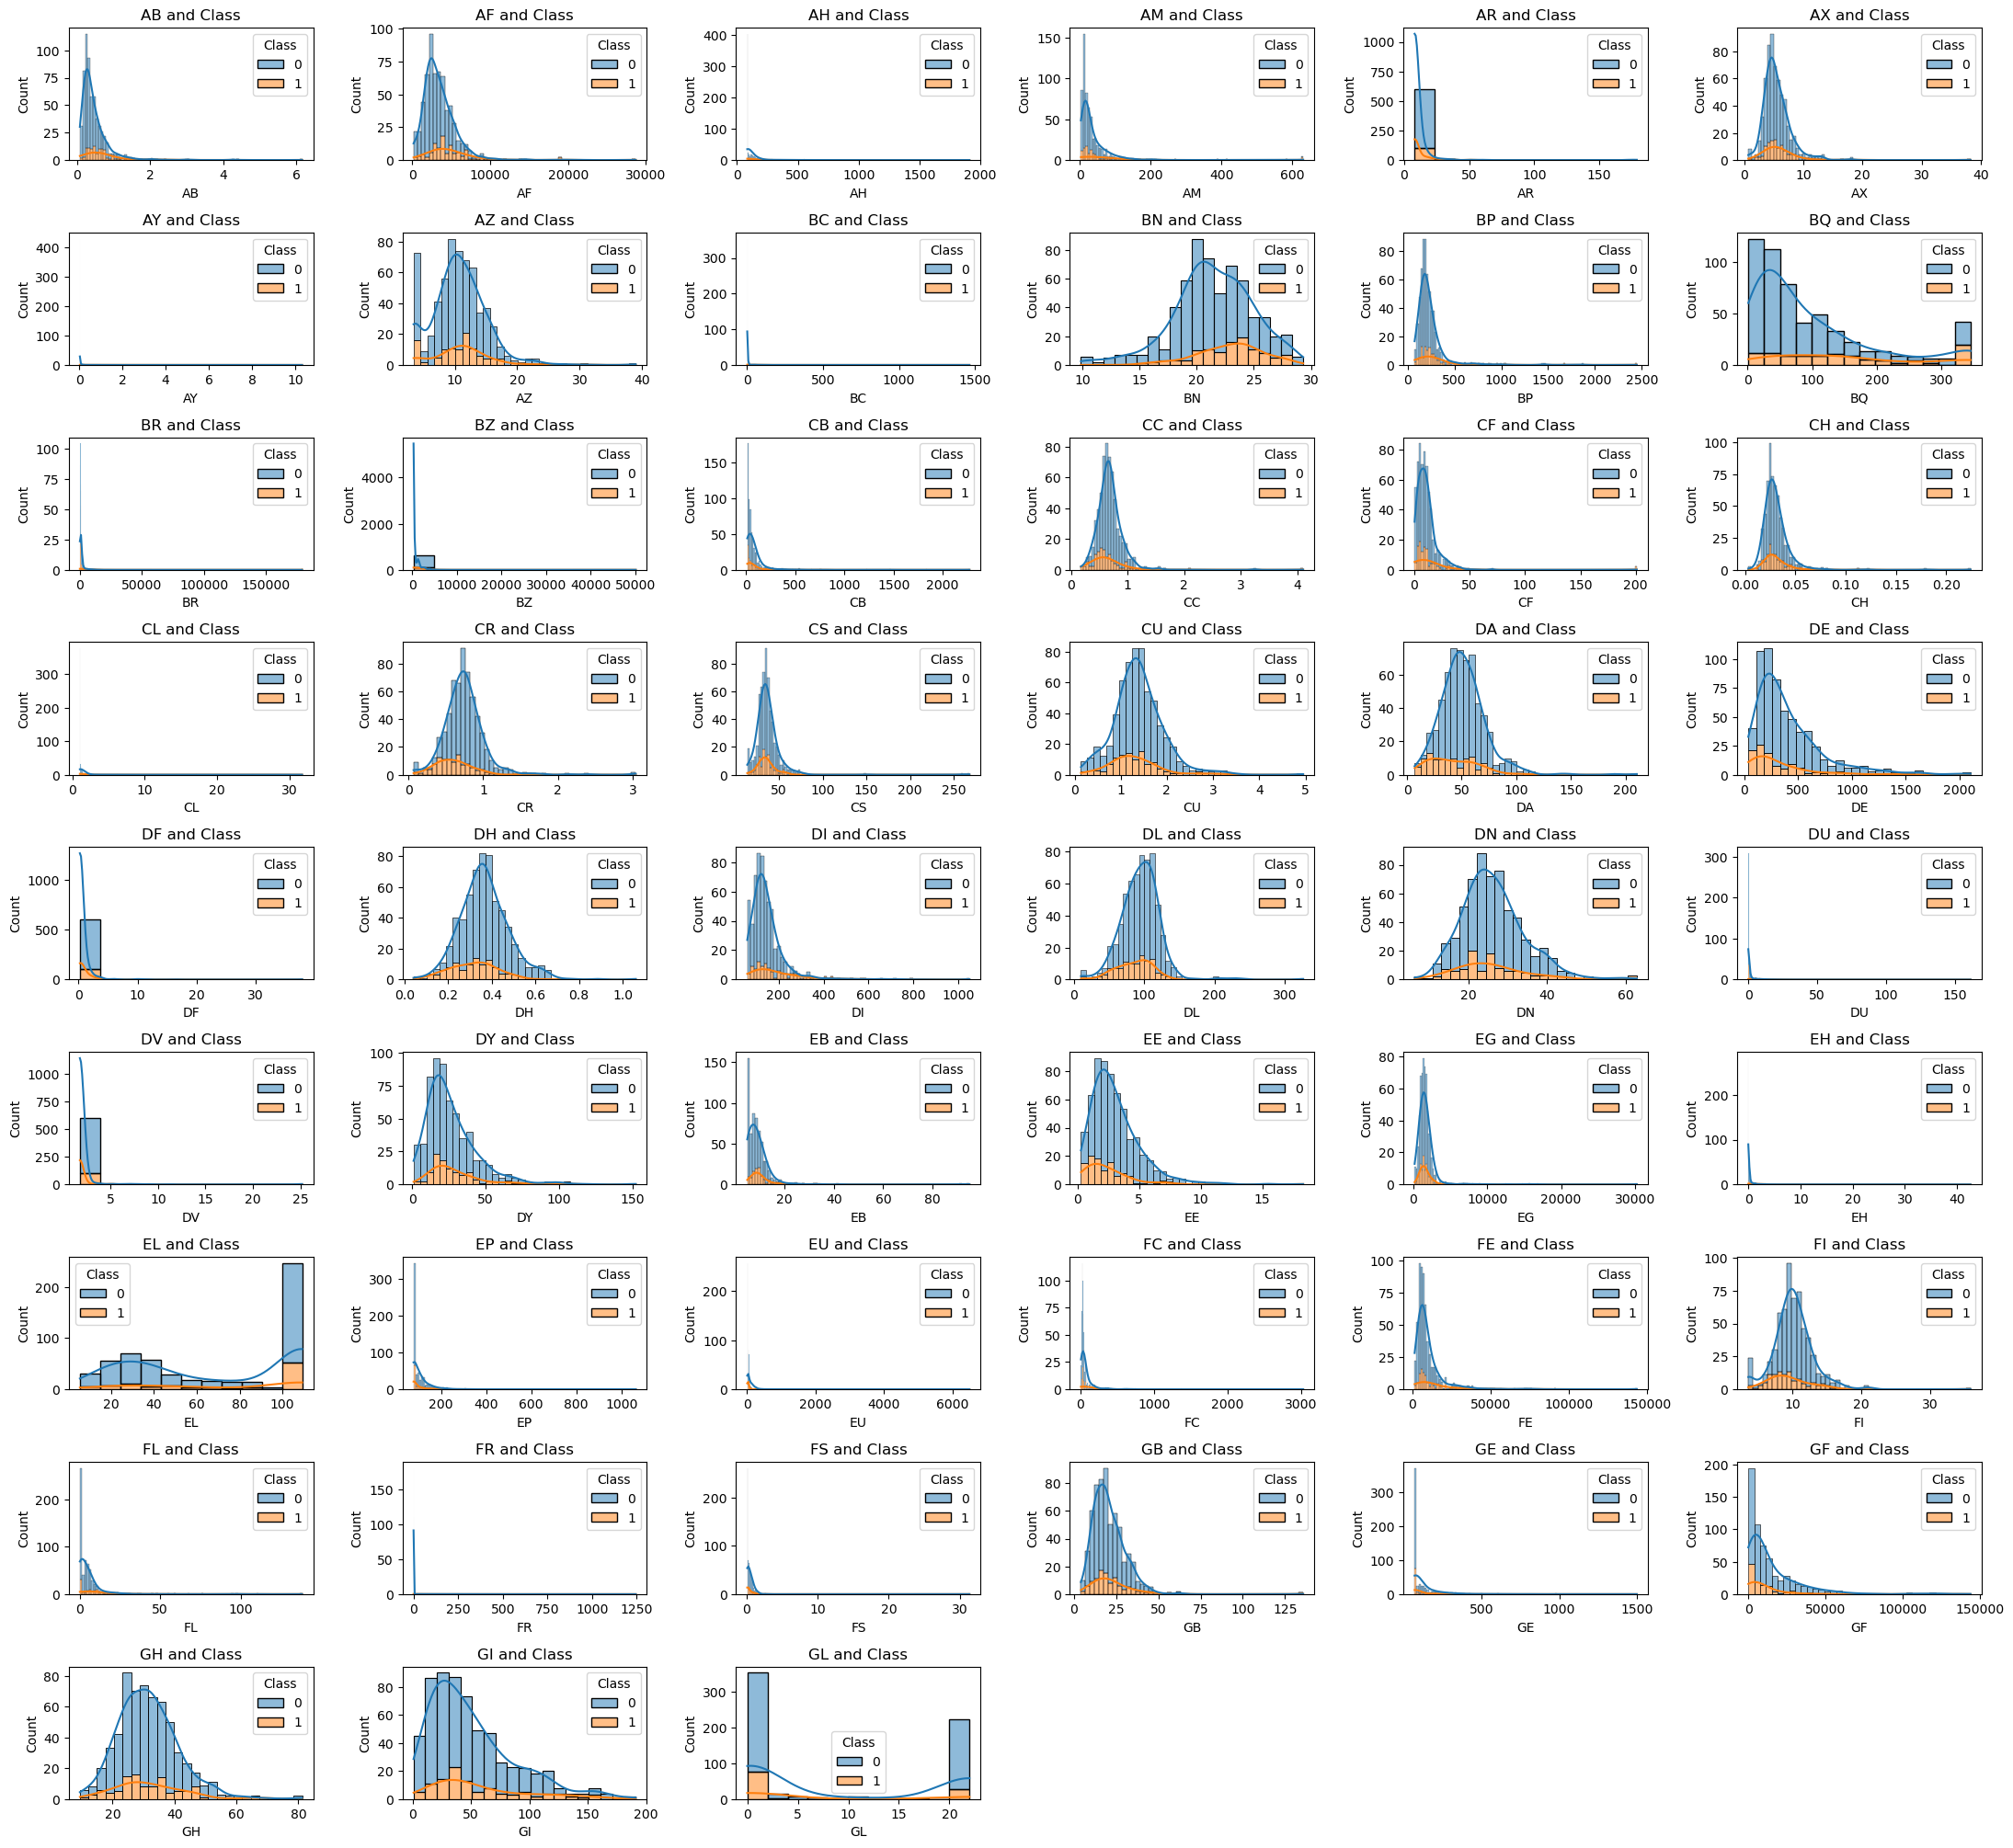

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

# Define the columns you want to plot
columns_to_plot = [
    'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BN', 'BP',
    'BQ', 'BR', 'BZ', 'CB', 'CC', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
    'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
    'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FE', 'FI', 'FL',
    'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'
]

# Set the number of rows and columns for the subplots
num_rows = 10
num_cols = 6

# Calculate the total number of subplots
total_subplots = num_rows * num_cols

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 22))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through the columns and create each subplot
for i, column in enumerate(columns_to_plot):
    if i >= total_subplots:
        break  # Exit the loop if there are no more subplots
    ax = axes[i]  # Get the current axis
    sns.histplot(data=df, x=column, hue="Class", multiple="stack", kde=True, ax=ax)
    ax.set_title(f'{column} and Class')  # Set the subplot title

# Remove any unused subplots
for j in range(len(columns_to_plot), total_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust the layout for a better presentation
plt.show()


The above graph gives us the distribution of target variable amongst each health condition.

**BoxPlot Of Numerical Features...**

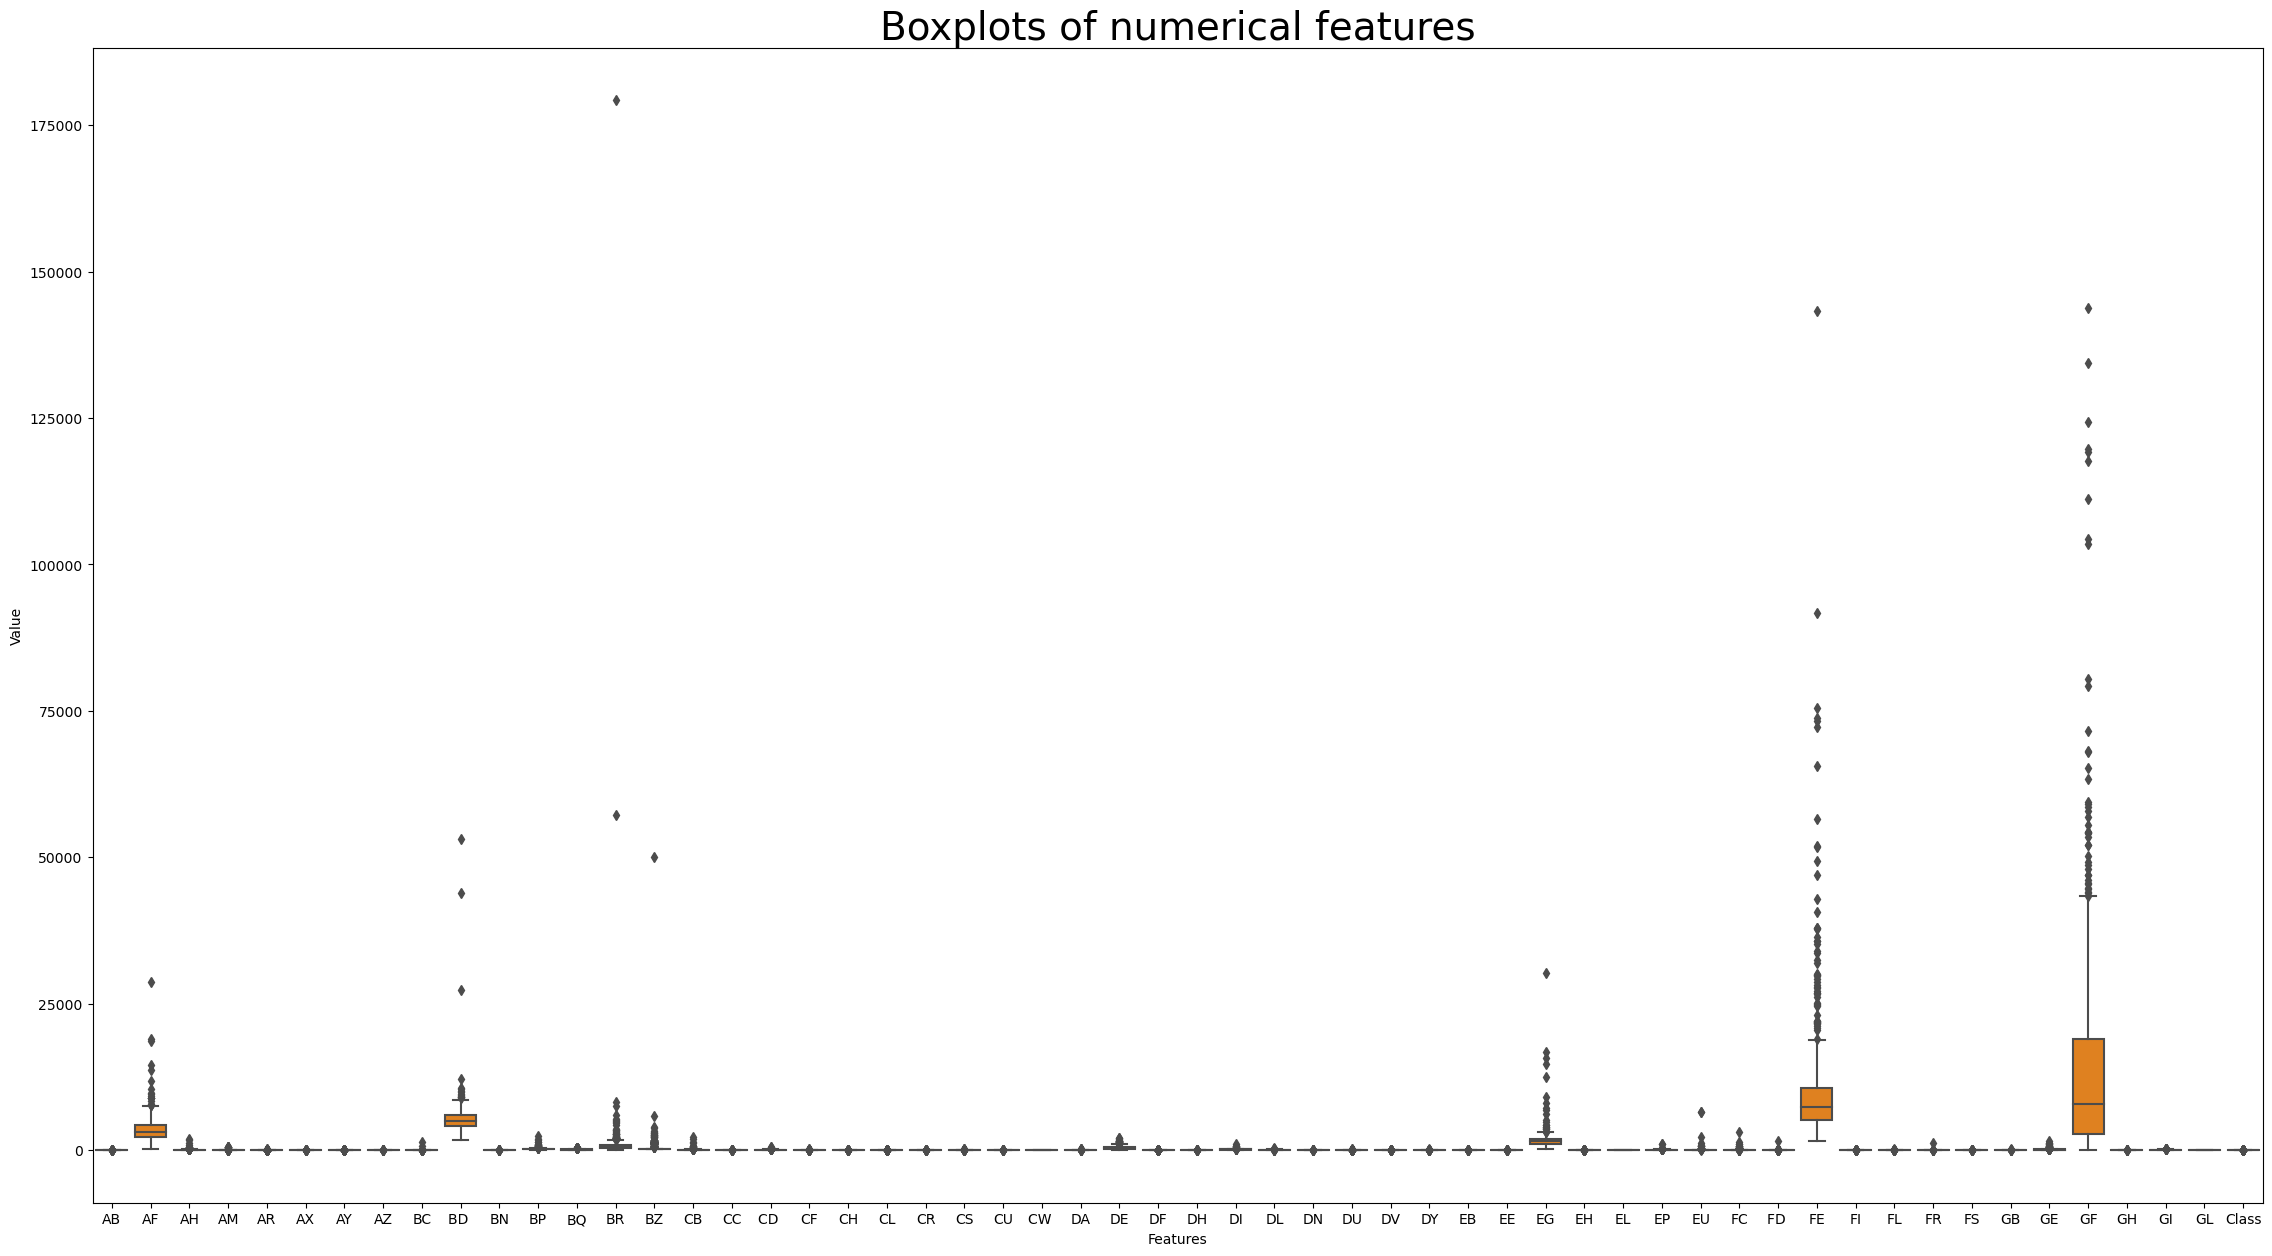

In [12]:
plt.figure(figsize=(28, 15))
dist_boxplots = sns.boxplot(data=df, color="#ff8200")

plt.title('Boxplots of numerical features', fontsize=28)
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()


Using Boxplot: we have checked the distribution of outliers:

The box plot gave us a clear picture of the outliers for each health condition, we will definitely take care of these later

AF, BD, BR, BZ, EF, FE and GF are some examples


**Removing outliers**

In [13]:
import pandas as pd

# Define the columns to remove outliers from
columns_to_remove_outliers = ['AF', 'EG', 'FE', 'GF']

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    if column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    else:
        print(f"Column '{column}' not found in DataFrame.")
        return data

# Loop through the columns and remove outliers
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column)




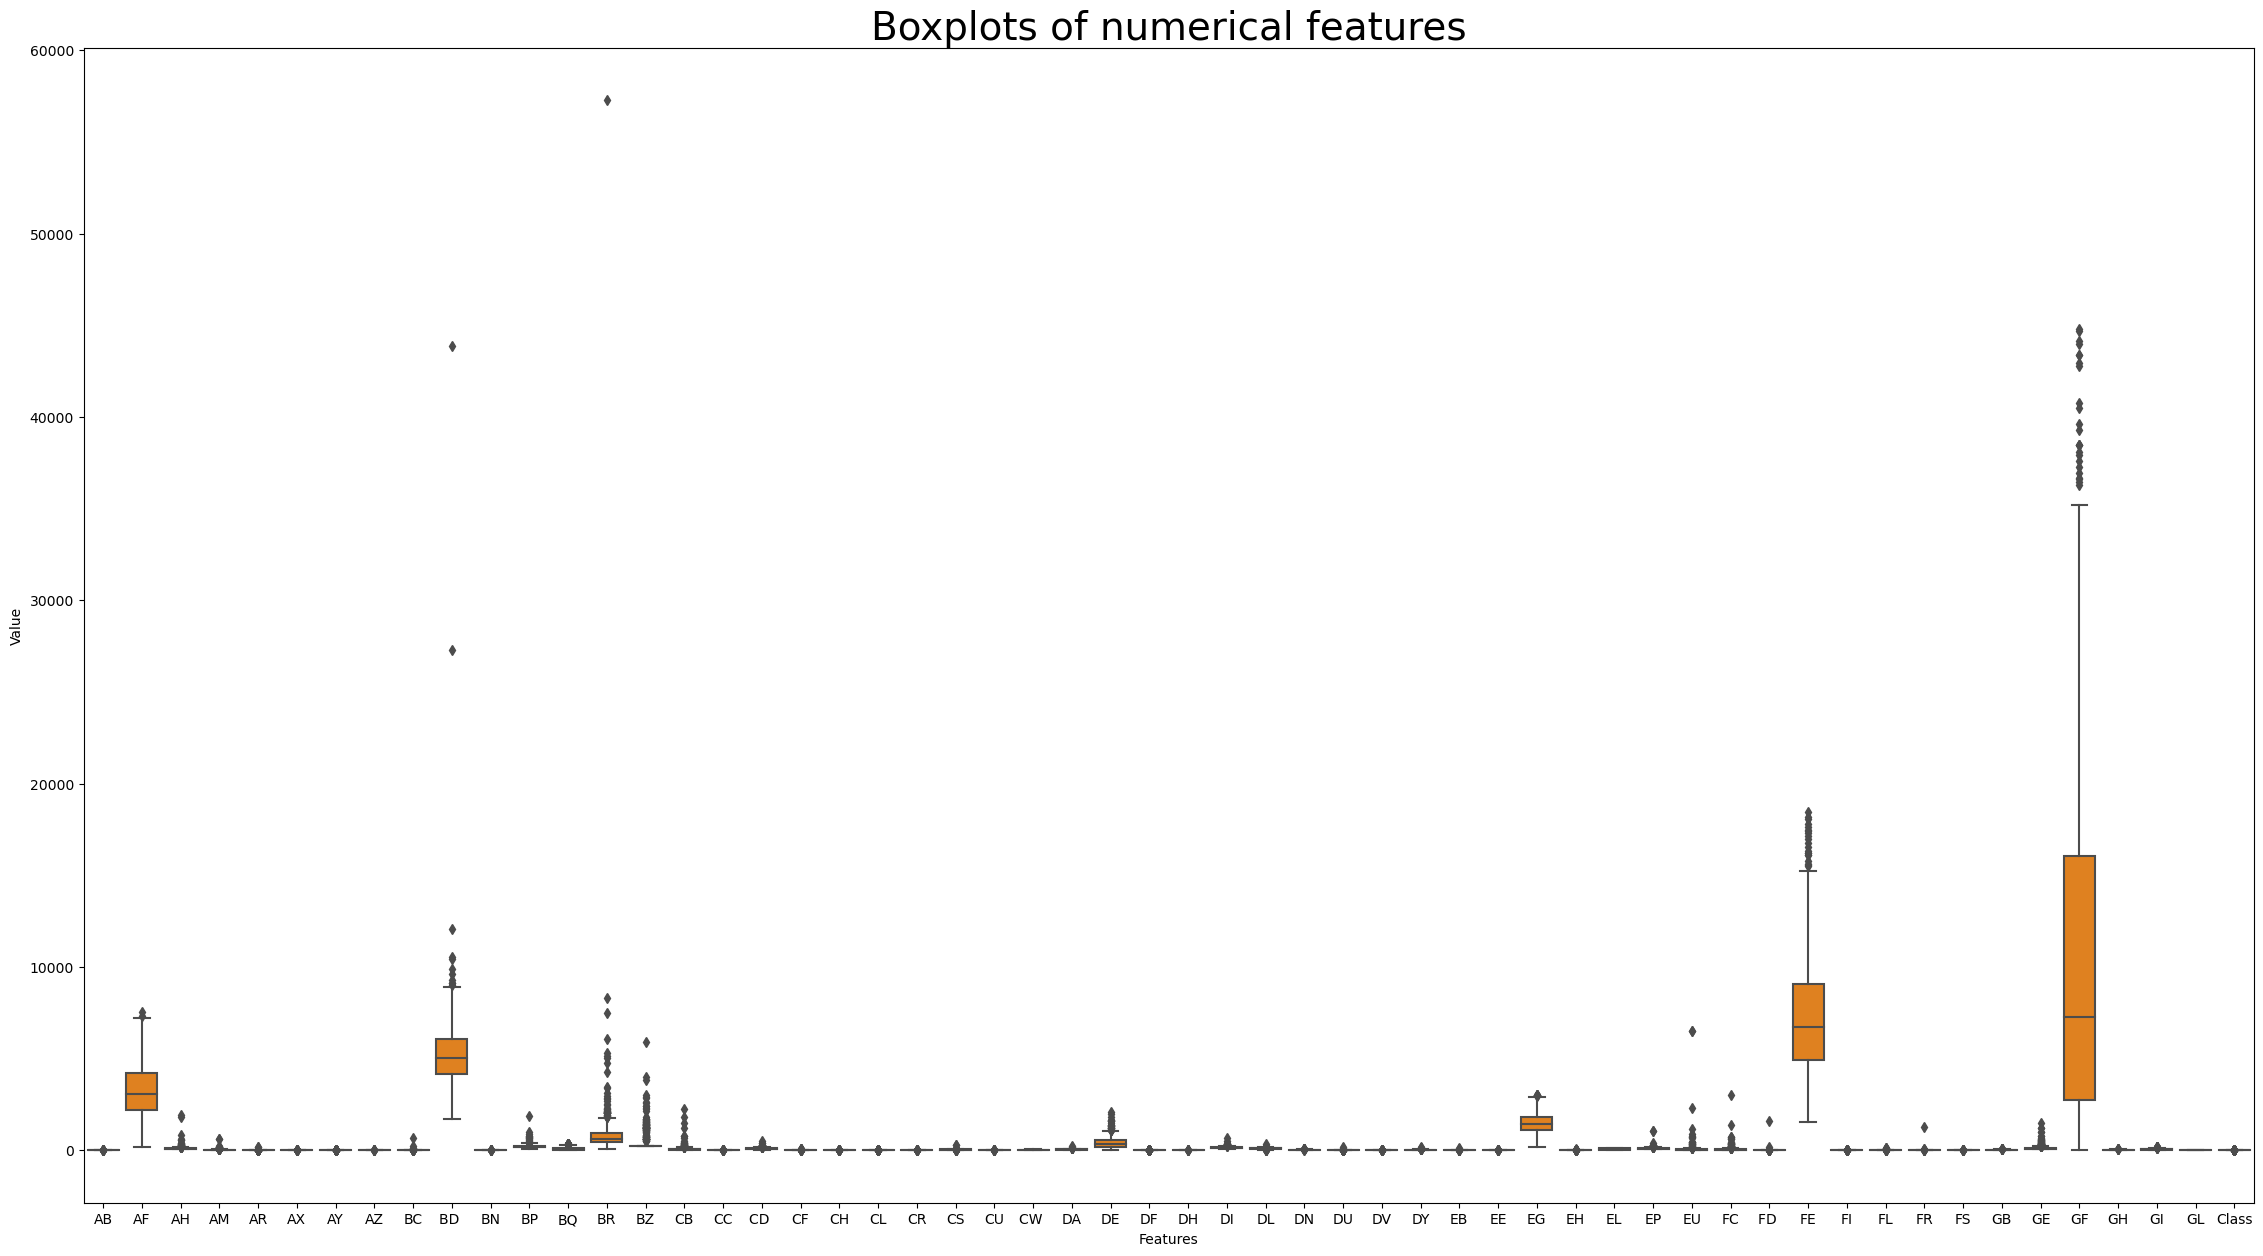

In [14]:
plt.figure(figsize=(28, 15))
dist_boxplots = sns.boxplot(data=df, color="#ff8200")

plt.title('Boxplots of numerical features', fontsize=28)
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()


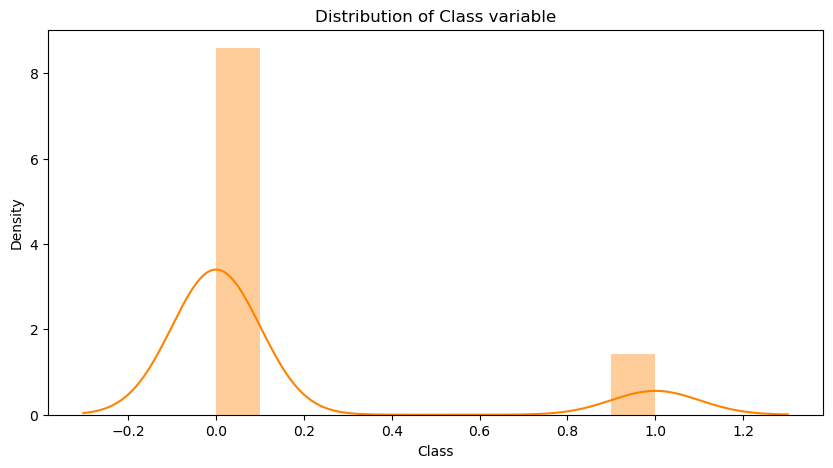

In [15]:
# creating viz for the Class distribution.

f, ax = plt.subplots(figsize=(10,5))
x = df['Class']
ax = sns.distplot(x, bins=10, color='#ff8200')
ax.set_title("Distribution of Class variable")
plt.show()

In [16]:
correlationmat = df.corr()
correlationmat

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.161441,0.174042,0.562566,0.178572,0.283049,0.012106,0.123022,0.057374,0.097664,...,0.296553,0.001294,0.192494,0.182293,-0.069243,-0.014179,0.054679,-0.034524,-0.171369,0.135298
AF,0.161441,1.000000,0.051894,0.105678,0.041605,0.053841,0.071140,0.160215,0.109711,0.089123,...,0.085175,0.023425,-0.006408,0.093827,0.085996,-0.111382,0.089809,0.128532,-0.131560,0.177258
AH,0.174042,0.051894,1.000000,0.003148,0.827235,0.002456,0.061723,0.115913,0.123662,-0.030760,...,-0.031362,-0.011142,0.088634,-0.018389,-0.015026,-0.025669,-0.069117,-0.086595,0.029457,0.008781
AM,0.562566,0.105678,0.003148,1.000000,0.094041,0.184407,0.137578,0.106459,0.048916,0.166565,...,0.263797,-0.009469,0.186508,0.120499,-0.037321,0.024342,0.077875,-0.021178,-0.116467,0.081688
AR,0.178572,0.041605,0.827235,0.094041,1.000000,0.006627,0.105294,0.114019,0.097415,-0.025598,...,0.065527,-0.007166,0.090255,-0.055842,0.045264,-0.007350,-0.133229,0.003878,0.048944,0.006191
AX,0.283049,0.053841,0.002456,0.184407,0.006627,1.000000,0.018926,0.155452,-0.034424,0.070892,...,0.045104,-0.028728,0.151058,0.168831,0.105084,0.001273,0.027001,0.023647,-0.048387,0.005447
AY,0.012106,0.071140,0.061723,0.137578,0.105294,0.018926,1.000000,0.045761,0.312426,0.689789,...,-0.029521,-0.003339,-0.037453,0.031347,0.000397,0.005702,0.214503,0.021226,0.080546,0.101803
AZ,0.123022,0.160215,0.115913,0.106459,0.114019,0.155452,0.045761,1.000000,0.036110,0.178476,...,-0.034255,-0.008977,0.038486,0.211061,0.017171,0.194209,0.132290,0.070821,0.114709,0.010582
BC,0.057374,0.109711,0.123662,0.048916,0.097415,-0.034424,0.312426,0.036110,1.000000,0.565990,...,-0.000498,0.084634,-0.046941,0.013852,-0.024278,-0.046399,0.199124,-0.024135,-0.015514,0.195729
BD,0.097664,0.089123,-0.030760,0.166565,-0.025598,0.070892,0.689789,0.178476,0.565990,1.000000,...,0.000275,-0.014412,0.100277,0.204318,-0.065060,0.054626,0.284389,0.036684,-0.000174,0.123314


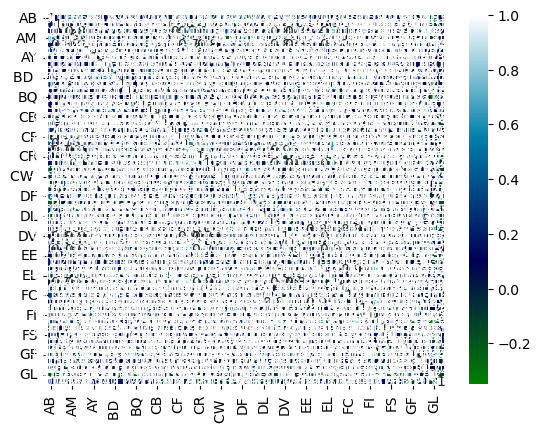

In [17]:
sns.heatmap(correlationmat, cmap='ocean', annot=True)
plt.show()

In [18]:
num_columns = df.columns.tolist()[1:-1]
cat_columns = 'EJ'
num_columns.remove(cat_columns)

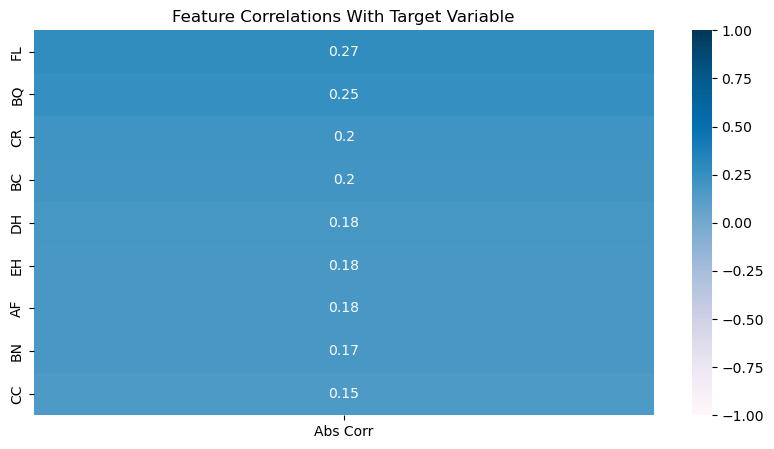

In [19]:
#Most Correlated features with our Target Variable

correlations = df.loc[:, num_columns].corrwith(df['Class']).to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']

fig, ax = plt.subplots(figsize=(10, 5))
significant_correlations = sorted_correlations.iloc[1:][sorted_correlations >= 0.15]
sns.heatmap(significant_correlations.to_frame(), cmap='PuBu', annot=True, vmin=-1, vmax=1, ax=ax)

plt.title('Feature Correlations With Target Variable')
plt.show()

This graph display the relationship of target variable with different health condition displaying only numbers greater than 0.15C

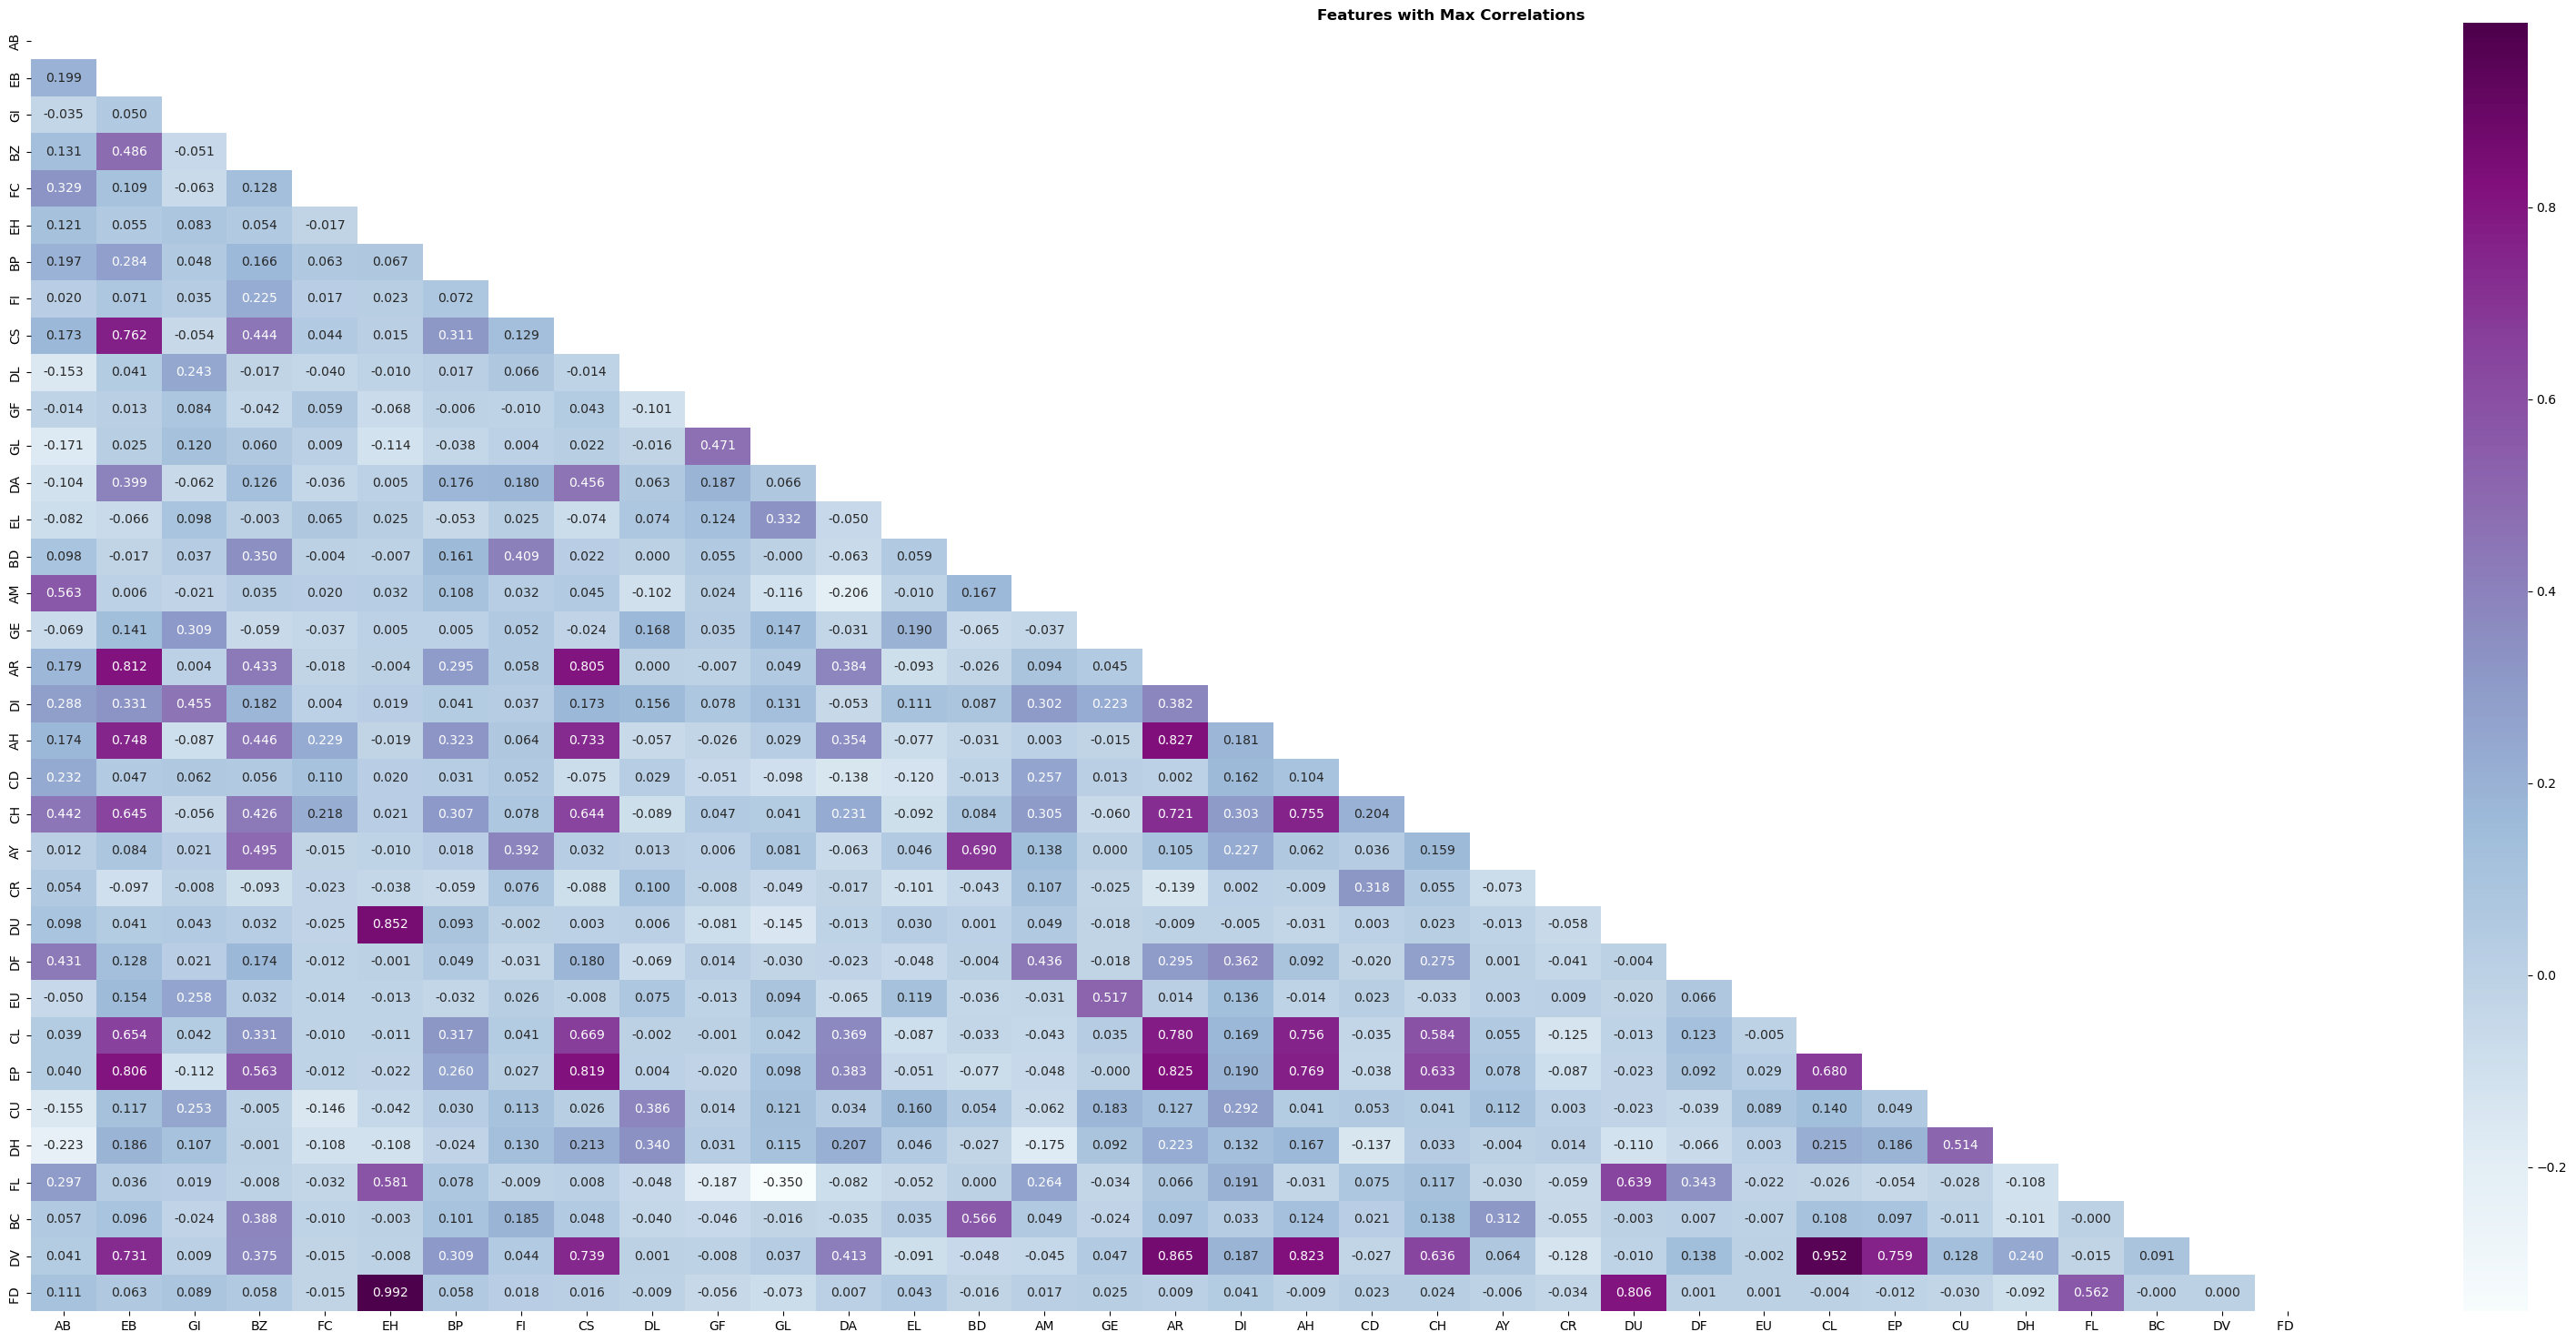

In [20]:
correlations = df.loc[:, num_columns].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]  # Preventing 1.0 correlation
corr_max = list(set(correlations.level_0.head(150).tolist()))
corr_min = list(set(correlations.level_0.tail(34).tolist())) 

correlation_train = df.loc[:, corr_max].corr()
mask = np.triu(correlation_train.corr())

plt.figure(figsize=(32, 15))
sns.heatmap(correlation_train,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='BuPu',
            linewidths=0.00,
            cbar=True)

plt.suptitle('Features with Max Correlations', weight='bold')
plt.tight_layout()

Heatmap displays the relation b/w the health conditions purple being highly correlated and below being the least

AND
Scatter plot was plotted to understand the distribution between each condition


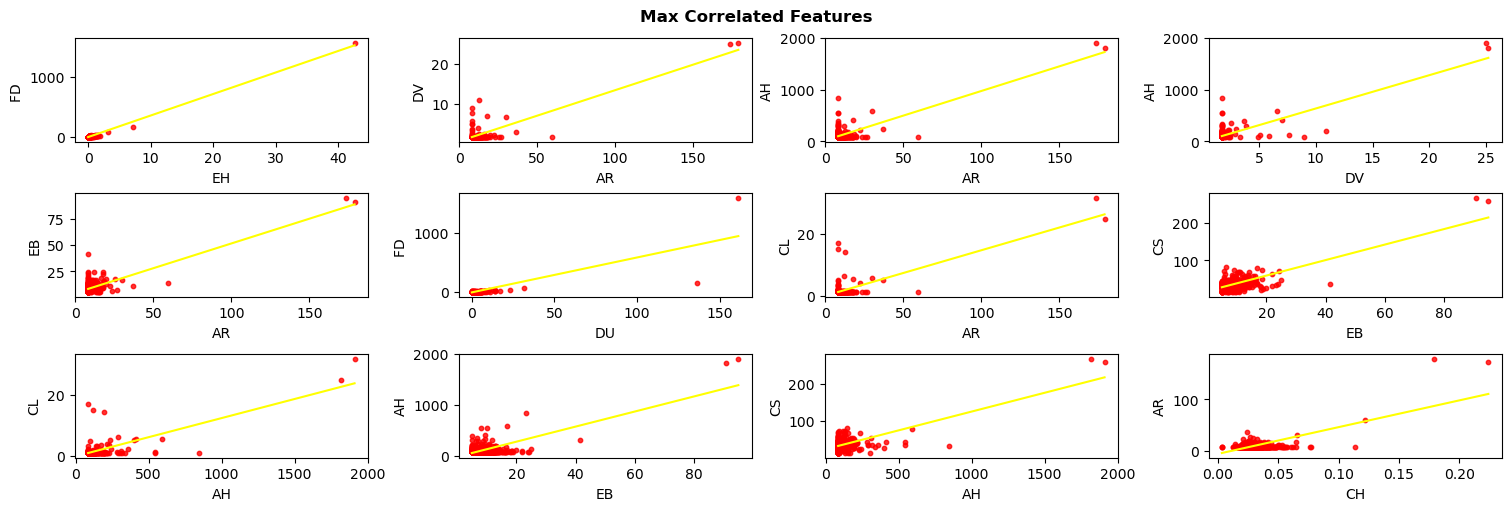

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(15, 5), constrained_layout=True)
axes = axes.flatten()

i = 0
for row in range(0, 48, 4):
    feat1 = correlations.iloc[row, 0]
    feat2 = correlations.iloc[row, 1]

    sns.regplot(data=df, x=feat1, y=feat2, ci=False, ax=axes[i], order=1, scatter_kws={'color': 'Red', 's': 10}, line_kws={'color': 'yellow', 'linewidth': 1.5})
    i += 1

plt.suptitle('Max Correlated Features', weight='bold')
plt.show()

## Feature Engineering

##### Checking and dropping duplicate and missing values..

In [22]:
#checking for duplicate values
dup_vals = df.duplicated()
print("No. of duplicate values:", dup_vals.sum())
df.drop_duplicates(inplace=True)

No. of duplicate values: 0


In [23]:
#checking for missing values
missing_vals= df.isnull().sum()
print("No. of missing values:\n", missing_vals)
df.dropna(inplace=True)

No. of missing values:
 Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       55
BR        0
BZ        0
CB        2
CC        2
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        0
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       54
EP        0
EU        0
FC        0
FD        0
FE        0
FI        0
FL        0
FR        0
FS        0
GB        0
GE        0
GF        0
GH        0
GI        0
GL        0
Class     0
dtype: int64


**Replacing Missing Values**

In [24]:
df.fillna(df.mean(), inplace=True)
missing_vals= df.isnull().sum()
print("No. of missing values:\n", missing_vals)
df.dropna(inplace=True)

No. of missing values:
 Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64


**Convert categorical data into numerical data using one-hot encoding or any other label encoding approach.**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      435 non-null    object 
 1   AB      435 non-null    float64
 2   AF      435 non-null    float64
 3   AH      435 non-null    float64
 4   AM      435 non-null    float64
 5   AR      435 non-null    float64
 6   AX      435 non-null    float64
 7   AY      435 non-null    float64
 8   AZ      435 non-null    float64
 9   BC      435 non-null    float64
 10  BD      435 non-null    float64
 11  BN      435 non-null    float64
 12  BP      435 non-null    float64
 13  BQ      435 non-null    float64
 14  BR      435 non-null    float64
 15  BZ      435 non-null    float64
 16  CB      435 non-null    float64
 17  CC      435 non-null    float64
 18  CD      435 non-null    float64
 19  CF      435 non-null    float64
 20  CH      435 non-null    float64
 21  CL      435 non-null    float64
 22  CR

In [26]:
# Using one-hot encoding to change categorical columns to number columns
cols=["Id", "EJ"]
encodeddata = pd.get_dummies(df,cols,drop_first=True)

In [27]:
encodeddata.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,Id_fb7584f887fd,Id_fbb79ba9d642,Id_fbc241daef00,Id_fbd12c4ae88b,Id_fd1dd68d51b4,Id_fd3dafe738fd,Id_fd895603f071,Id_fd8ef6377f76,Id_ffcca4ded3bb,EJ_B
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,0,0,0,0,0,0,0,0,0,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0,0,0,0,0,0,0,0,0,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0,0,0,0,0,0,0,0,0,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,0,0,0,0,0,0,0,0,0,1
5,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,5237.54088,...,0,0,0,0,0,0,0,0,0,0


**The above code performs one-hot encoding on the specified categorical columns in df using the "get dummies" function. The decoded data is saved in a new df known as encodeddata, where the original categorical columns have been swapped out for a set of new number columns that each represent a different and distinct value of the decoded data.**

**The 1st dummy variable for each categorical column is deleted using the drop first=True to prevent multi-collinearity in df.**

In [28]:
df.shape

(435, 58)

In [29]:
df=encodeddata

In [30]:
df.shape

(435, 491)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 616
Columns: 491 entries, AB to EJ_B
dtypes: float64(55), int64(1), uint8(435)
memory usage: 378.5 KB


**Rescaling features to a small range by utilizing a normalization or standardization function.**

In [32]:
#Transformation of data to the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
scaled_data = pd.DataFrame(df, columns=names, index=indexes)
scaled_data


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,Id_fb7584f887fd,Id_fbb79ba9d642,Id_fbc241daef00,Id_fbd12c4ae88b,Id_fd1dd68d51b4,Id_fd3dafe738fd,Id_fd895603f071,Id_fd8ef6377f76,Id_ffcca4ded3bb,EJ_B
0,0.042584,0.396404,0.000000,0.028940,0.000000,0.000000,0.000000,0.239417,0.006735,0.057669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.020558,0.106857,0.000000,0.052213,0.000000,0.234419,0.000000,0.377705,0.000000,0.090150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.132159,0.331988,0.000000,0.044854,0.000000,0.482295,0.000000,0.351834,0.000000,0.081590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.101322,0.481221,0.000000,0.015701,0.000000,0.259207,0.002841,0.000000,0.157120,0.095644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.042584,0.329366,0.000000,0.006820,0.000000,0.264873,0.000000,0.341486,0.000000,0.084002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.030837,0.328204,0.000000,0.004466,0.000000,0.266289,0.000000,0.000000,0.000000,0.120028,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
612,0.022026,0.399262,0.021132,0.008372,0.028583,0.223796,0.005030,0.192145,0.002451,0.058406,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
613,0.120411,0.716226,0.000000,0.067514,0.045868,0.422096,0.000030,0.344309,0.003966,0.093875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
614,0.117474,0.308066,0.024625,0.081573,0.010930,0.589235,0.000000,0.448260,0.000000,0.099440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
scaled_data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,Id_fb7584f887fd,Id_fbb79ba9d642,Id_fbc241daef00,Id_fbd12c4ae88b,Id_fd1dd68d51b4,Id_fd3dafe738fd,Id_fd895603f071,Id_fd8ef6377f76,Id_ffcca4ded3bb,EJ_B
0,0.042584,0.396404,0.0,0.028940,0.0,0.000000,0.000000,0.239417,0.006735,0.057669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.020558,0.106857,0.0,0.052213,0.0,0.234419,0.000000,0.377705,0.000000,0.090150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.132159,0.331988,0.0,0.044854,0.0,0.482295,0.000000,0.351834,0.000000,0.081590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.101322,0.481221,0.0,0.015701,0.0,0.259207,0.002841,0.000000,0.157120,0.095644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.042584,0.329366,0.0,0.006820,0.0,0.264873,0.000000,0.341486,0.000000,0.084002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Setting target variable

In [34]:
#input variables = 'x' and target variable = 'y'

Y = scaled_data['Class']
X = scaled_data.drop(['Class'], axis=1)

In [35]:
class_count = scaled_data['Class'].value_counts()

# Calculate the number of occurrences for each class
print(class_count)

0.0    368
1.0     67
Name: Class, dtype: int64


Class=1, n=368 (50.000%)
Class=0, n=368 (50.000%)


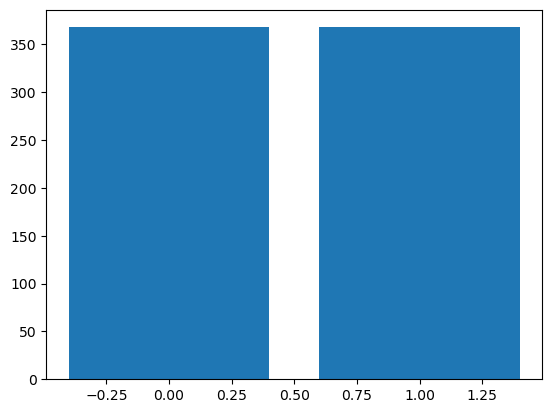

In [36]:
!pip install imblearn
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np

# Assuming scaled_data is pre-processed input data & Y is the target variable

# Converting Y to a 1D array
Y = np.ravel(Y)

oversampled = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversampled.fit_resample(X, Y)

counter = Counter(y_resampled)
for k, v in counter.items():
    per = v / len(y_resampled) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

# Modelling 

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)

## Logistic Regression

Accuracy for LR: 0.9411764705882353


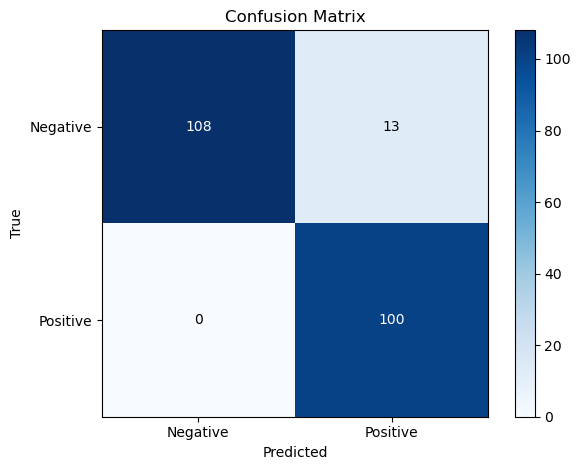

Precision for LR: 0.8849557522123894
Recall for LR: 1.0
F1 score for LR: 0.9389671361502347


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

model = LogisticRegression()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for LR:", accuracy)

# Step 2: Computing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualizing the Confusion Matrix
labels = ['Negative', 'Positive']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Calculating precision
precision = precision_score(y_test, y_pred)
print("Precision for LR:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred)
print("Recall for LR:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for LR:", f1)


## Random Forest 

Accuracy for RF: 0.9864253393665159
Confusion Matrix for RF:
[[118   3]
 [  0 100]]
Precision for RF: 0.970873786407767
Recall for RF: 1.0
F1 score for RF: 0.9852216748768473


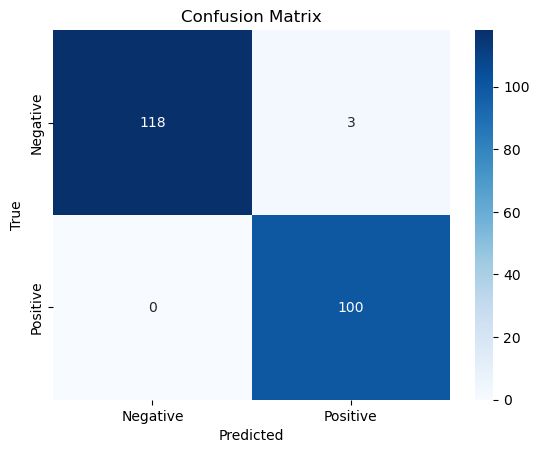

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing the Random Forest Classification model
model = RandomForestClassifier()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for RF:", accuracy)

# Computing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for RF:")
print(cm)

# Calculating precision
precision = precision_score(y_test, y_pred)
print("Precision for RF:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred)
print("Recall for RF:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for RF:", f1)

# Visualizing Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Gradient Boosting

Accuracy for GB: 0.9683257918552036
Confusion Matrix for GB:
[[114   7]
 [  0 100]]
Precision for GB: 0.9345794392523364
Recall for GB: 1.0
F1 score for GB: 0.966183574879227


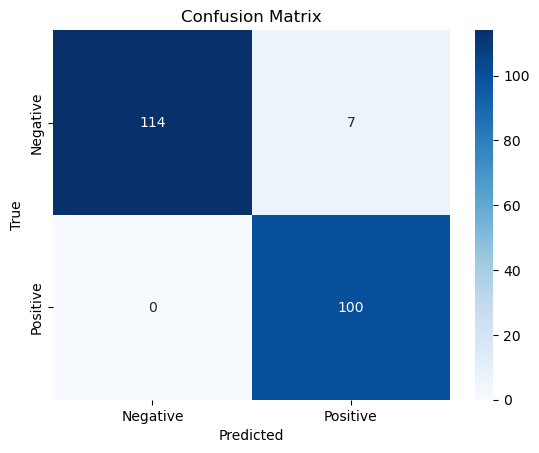

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing the Gradient Boosting Classification model
model = GradientBoostingClassifier()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for GB:", accuracy)

# Computing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for GB:")
print(cm)

# Calculating precision
precision = precision_score(y_test, y_pred)
print("Precision for GB:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred)
print("Recall for GB:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for GB:", f1)

# Visualizing Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Support Vector Machines 

Accuracy for SVM: 0.9592760180995475
Confusion Matrix for SVM:
[[112   9]
 [  0 100]]
Precision for SVM: 0.9174311926605505
Recall for SVM: 1.0
F1 score for SVM: 0.9569377990430622


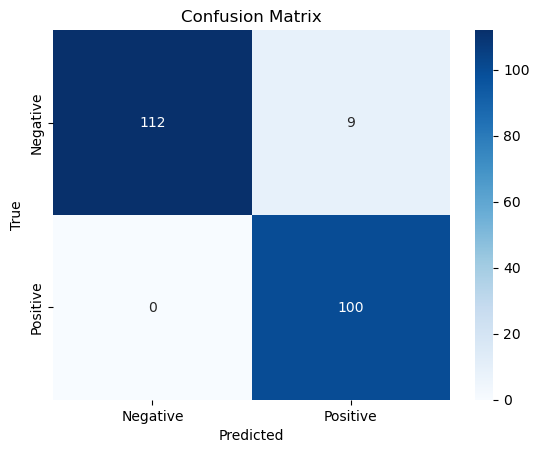

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM Classifier
model = SVC()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for SVM:", accuracy)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:")
print(cm)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for SVM:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for SVM:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for SVM:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



## Neural Network 

Accuracy for NN: 0.9592760180995475
Confusion Matrix for NN:
[[112   9]
 [  0 100]]
Precision for NN: 0.9174311926605505
Recall for NN: 1.0
F1 score for NN: 0.9569377990430622


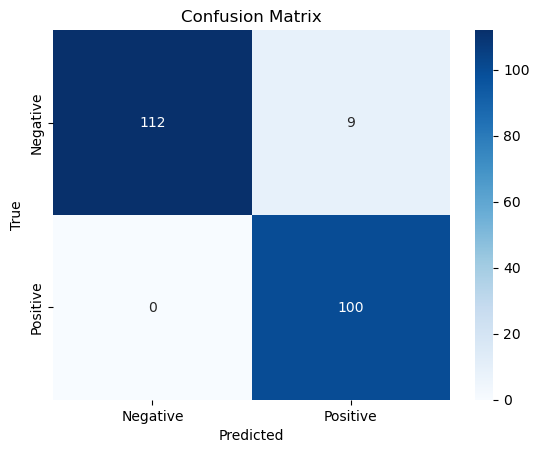

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for NN:", accuracy)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix for NN:")
print(cm)

# Calculate precision
precision = precision_score(y_test, y_pred_classes)
print("Precision for NN:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_classes)
print("Recall for NN:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes)
print("F1 score for NN:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Ensemble using Random Forest, SVM, and Neural Network models

Epoch 1/300
103/103 [==============================] - 2s 3ms/step - loss: 0.6950 - accuracy: 0.5223
Epoch 2/300
103/103 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5534
Epoch 3/300
103/103 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.5728
Epoch 4/300
103/103 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6641
Epoch 5/300
103/103 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.7204
Epoch 6/300
103/103 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.8097
Epoch 7/300
103/103 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.8485
Epoch 8/300
103/103 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8990
Epoch 9/300
103/103 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.9262
Epoch 10/300
103/103 [==============================] - 0s 3ms/step - loss: 0.3781 - accura

103/103 [==============================] - 0s 3ms/step - loss: 3.1332e-04 - accuracy: 1.0000
Epoch 160/300
103/103 [==============================] - 0s 3ms/step - loss: 3.0056e-04 - accuracy: 1.0000
Epoch 161/300
103/103 [==============================] - 0s 2ms/step - loss: 2.8841e-04 - accuracy: 1.0000
Epoch 162/300
103/103 [==============================] - 0s 3ms/step - loss: 2.7661e-04 - accuracy: 1.0000
Epoch 163/300
103/103 [==============================] - 0s 2ms/step - loss: 2.6549e-04 - accuracy: 1.0000
Epoch 164/300
103/103 [==============================] - 0s 3ms/step - loss: 2.5434e-04 - accuracy: 1.0000
Epoch 165/300
103/103 [==============================] - 0s 2ms/step - loss: 2.4411e-04 - accuracy: 1.0000
Epoch 166/300
103/103 [==============================] - 0s 3ms/step - loss: 2.3422e-04 - accuracy: 1.0000
Epoch 167/300
103/103 [==============================] - 0s 2ms/step - loss: 2.2452e-04 - accuracy: 1.0000
Epoch 168/300
103/103 [============================

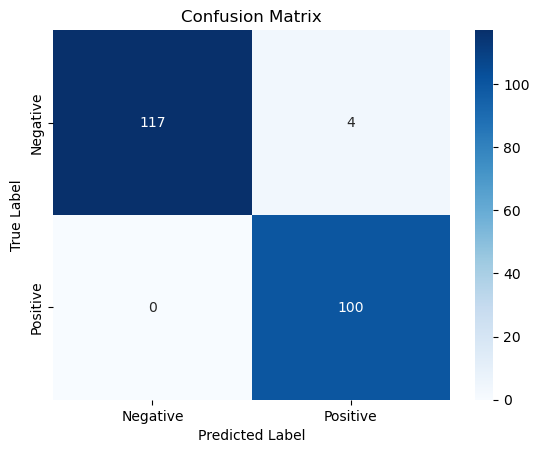

In [43]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)

# Train the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(4, input_dim=x_train.shape[1], activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=300, batch_size=5)
nn_predictions = nn_model.predict(x_test)
nn_predictions = np.round(nn_predictions).flatten()

# Combine predictions
ensemble_predictions = []

for rf_pred, svm_pred, nn_pred in zip(rf_predictions, svm_predictions, nn_predictions):
    # Apply the ensemble logic (e.g., voting)
    # Here, we use majority voting
    ensemble_pred = (rf_pred + svm_pred + nn_pred) >= 2
    ensemble_predictions.append(ensemble_pred)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, ensemble_predictions)
print("Confusion Matrix:")
print(cm)

# Calculate precision
precision = precision_score(y_test, ensemble_predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, ensemble_predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, ensemble_predictions)
print("F1 score:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## XGBoost 

Confusion Matrix for XGBoost:
[[112   9]
 [  0 100]]
Precision for XGBoost: 0.9174311926605505
Recall for XGBoost: 1.0
F1 score for XGBoost: 0.9569377990430622
Accuracy for XGBoost: 0.9592760180995475


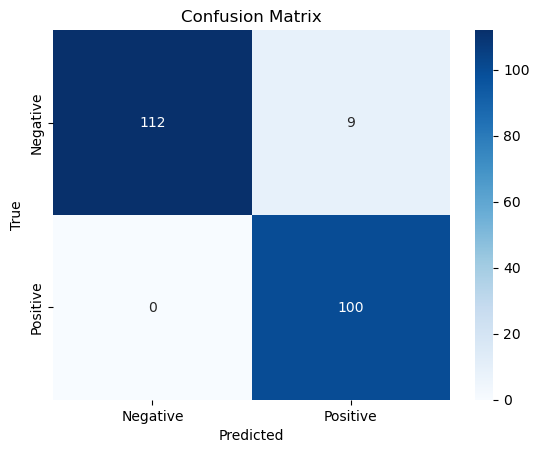

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for XGBoost:")
print(cm)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for XGBoost:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for XGBoost:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for XGBoost:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for XGBoost:", accuracy)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### KNN Classifier

Confusion Matrix for KNN:
[[112   9]
 [  0 100]]
Precision for KNN: 0.9174311926605505
Recall for KNN: 1.0
F1 score for KNN: 0.9569377990430622
Accuracy for KNN: 0.9592760180995475


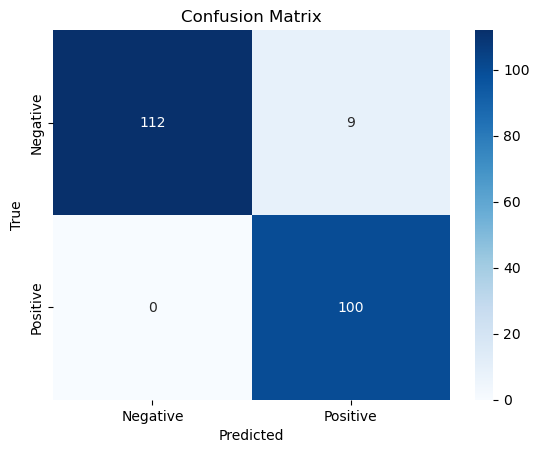

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(cm)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for KNN:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for KNN:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for KNN:", f1)

# Calculate accuracy
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy for KNN:", accuracy_KNN)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## HYPERPARAMETER TUNING

### Gradient Boosting 

Confusion Matrix for GB with Hyperparameter Tuning:
[[113   8]
 [  0 100]]
Precision for GB with Hyperparameter Tuning: 0.9259259259259259
Recall for GB with Hyperparameter Tuning: 1.0
F1 score for GB with Hyperparameter Tuning: 0.9615384615384615
Accuracy for GB with Hyperparameter Tuning: 0.9638009049773756


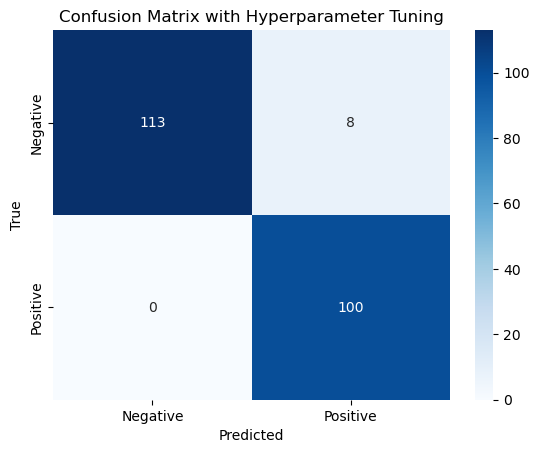

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model with tuned hyperparameters
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb_model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for GB with Hyperparameter Tuning:")
print(cm)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for GB with Hyperparameter Tuning:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for GB with Hyperparameter Tuning:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for GB with Hyperparameter Tuning:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for GB with Hyperparameter Tuning:", accuracy)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix with Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Logistic Regression 

Confusion Matrix for LR:
[[119   2]
 [  0 100]]
Accuracy for LR: 0.9909502262443439
Precision for LR: 0.9803921568627451
Recall for LR: 1.0
F1 score for LR: 0.99009900990099


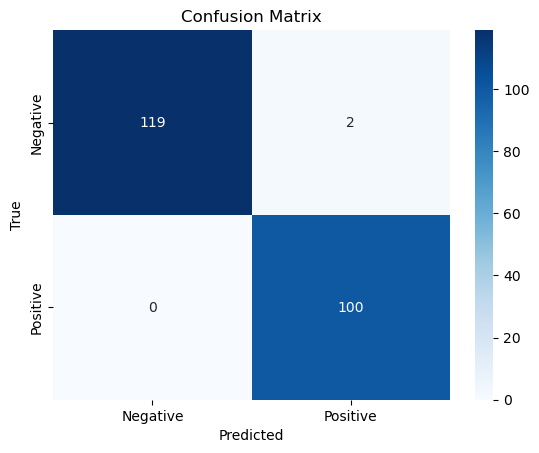

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # Add more parameters and their values as needed
}

# Create the model to be tuned
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for LR:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for LR:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for LR:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for LR:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for LR:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Support Vector Machine

Confusion Matrix for SVM:
[[119   2]
 [  0 100]]
Accuracy for SVM: 0.9909502262443439
Precision for SVM: 0.9803921568627451
Recall for SVM: 1.0
F1 score for SVM: 0.99009900990099


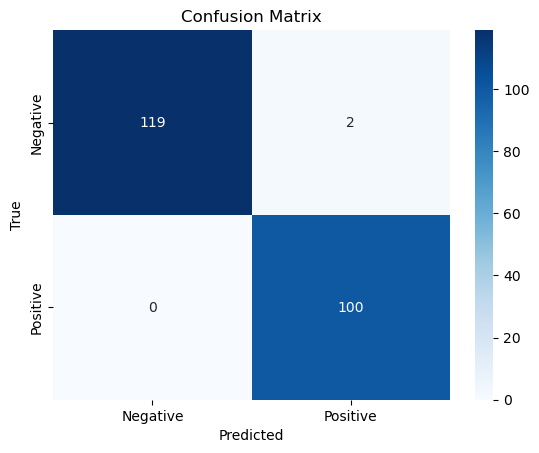

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:")
print(cm)

# Calculate accuracy
accuracy_HSVM = accuracy_score(y_test, y_pred)
print("Accuracy for SVM:", accuracy_HSVM)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for SVM:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for SVM:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for SVM:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## KNN Model 

Confusion Matrix for KNN:
[[119   2]
 [  0 100]]
Accuracy for KNN: 0.9909502262443439
Precision for KNN: 0.9803921568627451
Recall for KNN: 1.0
F1 score for KNN: 0.99009900990099


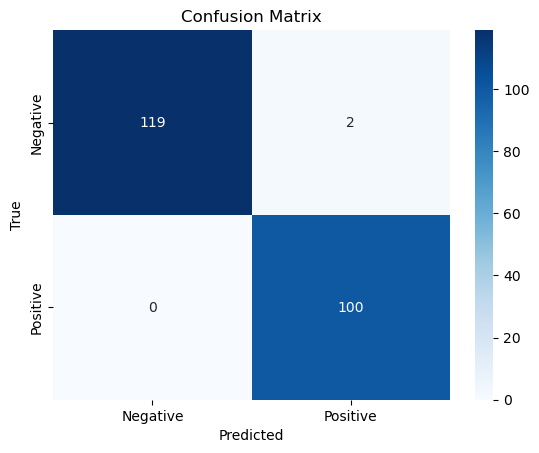

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(cm)

# Calculate accuracy
accuracy_HKNN = accuracy_score(y_test, y_pred)
print("Accuracy for KNN:", accuracy_HKNN)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision for KNN:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall for KNN:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score for KNN:", f1)

# Visualize Confusion Matrix
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The hyperparameter-tuned Logistic Regression, Support Vector Machine, and KNN models are all performing exceptionally well with almost perfect accuracy and precision-recall trade-off.
If we have to take a call, we would go ahead with logistic regression with HPT. As in this scenario simple model would fit the best